## Hand-Recognition Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OrdinalEncoder,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings("ignore")

### For Mlflow Best model Tracking

In [2]:
from Mlflow import track_model,track_grid_search,register_model,load_best_model,add_artifact

In [3]:
#read Data
df = pd.read_csv("hand_landmarks_data.csv")

In [4]:
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


In [5]:
df.shape

(25675, 64)

## EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [7]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,...,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,...,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,...,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,...,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,...,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,...,-0.020969,197.579865,221.781479,-0.029942,197.591736,222.381149,-0.028510,197.453270,222.485229,-0.025269
75%,266.428482,304.991663,2.989988e-07,261.147457,296.850769,-0.002783,255.876354,284.925993,-0.007134,254.622768,...,-0.013661,268.103920,273.190765,-0.019987,267.745743,274.196884,-0.017971,267.324657,275.805222,-0.014294
max,633.556020,781.674469,1.876254e-06,606.232386,751.869416,0.076365,598.541348,719.365010,0.094131,607.999801,...,0.031774,632.923029,779.419948,0.078105,638.134761,760.854103,0.104580,641.788521,760.554894,0.118668


array([[<Axes: title={'center': 'x1'}>, <Axes: title={'center': 'y1'}>,
        <Axes: title={'center': 'z1'}>, <Axes: title={'center': 'x2'}>,
        <Axes: title={'center': 'y2'}>, <Axes: title={'center': 'z2'}>,
        <Axes: title={'center': 'x3'}>, <Axes: title={'center': 'y3'}>],
       [<Axes: title={'center': 'z3'}>, <Axes: title={'center': 'x4'}>,
        <Axes: title={'center': 'y4'}>, <Axes: title={'center': 'z4'}>,
        <Axes: title={'center': 'x5'}>, <Axes: title={'center': 'y5'}>,
        <Axes: title={'center': 'z5'}>, <Axes: title={'center': 'x6'}>],
       [<Axes: title={'center': 'y6'}>, <Axes: title={'center': 'z6'}>,
        <Axes: title={'center': 'x7'}>, <Axes: title={'center': 'y7'}>,
        <Axes: title={'center': 'z7'}>, <Axes: title={'center': 'x8'}>,
        <Axes: title={'center': 'y8'}>, <Axes: title={'center': 'z8'}>],
       [<Axes: title={'center': 'x9'}>, <Axes: title={'center': 'y9'}>,
        <Axes: title={'center': 'z9'}>, <Axes: title={'center

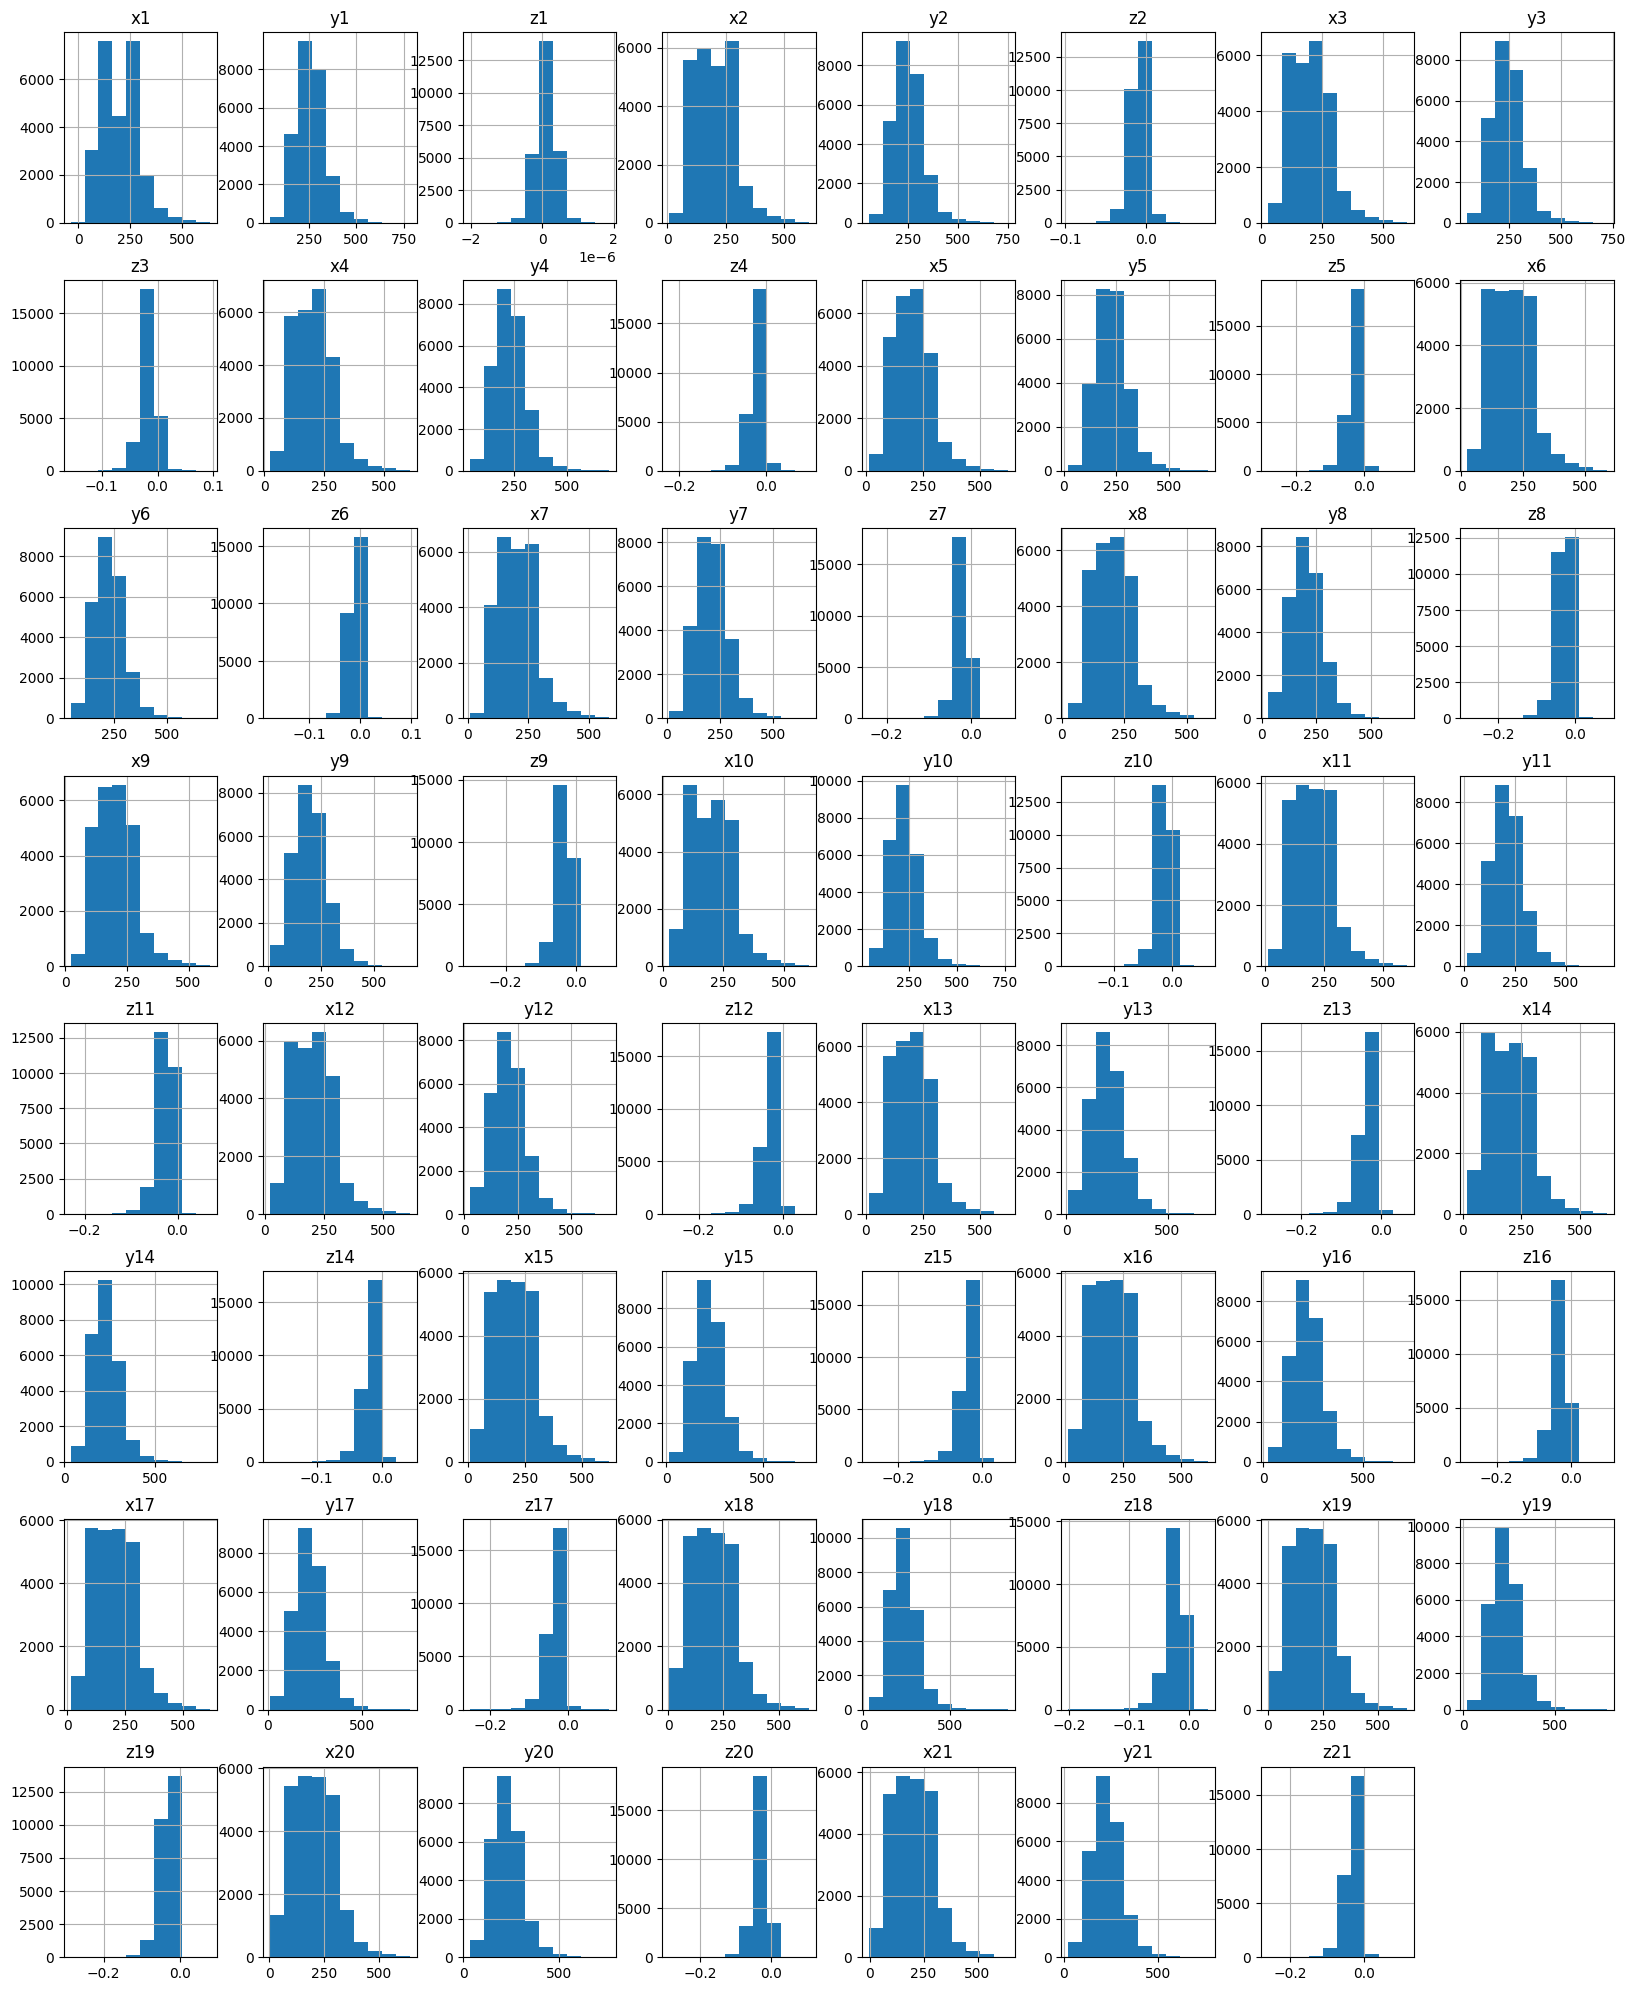

In [9]:
df.hist(figsize=(20,25))

### it seem that most of this data normal or semi normal and `Multi modal`

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


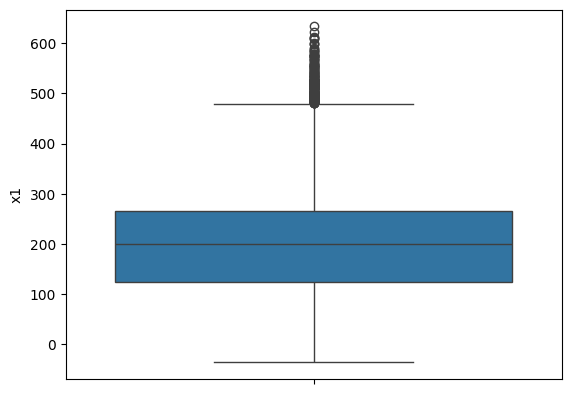

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


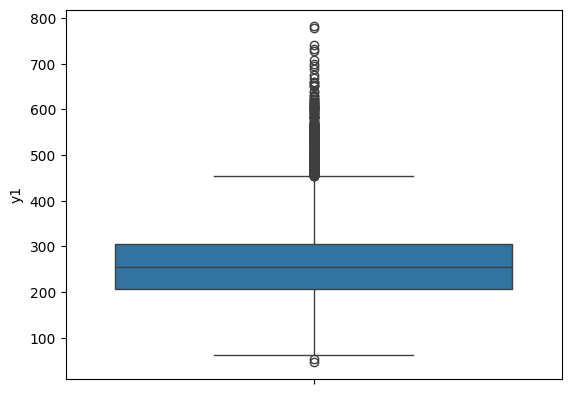

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


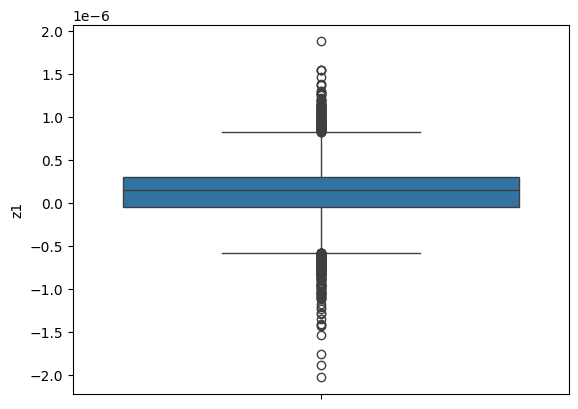

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


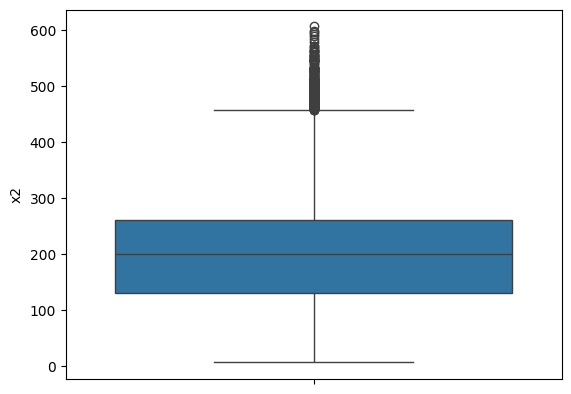

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


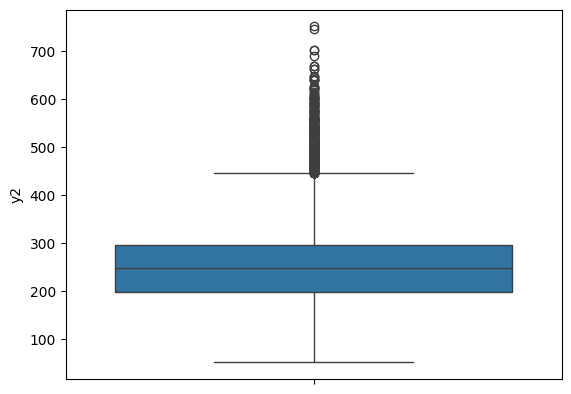

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


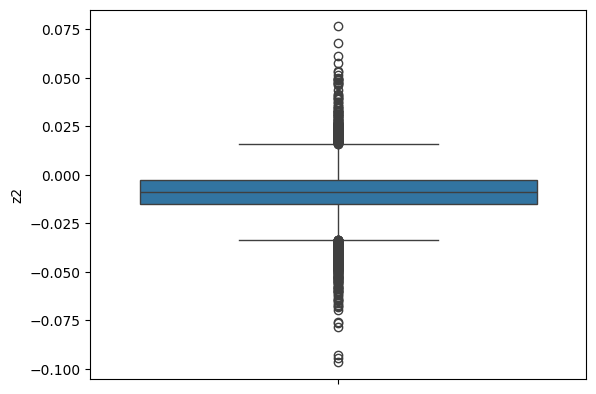

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


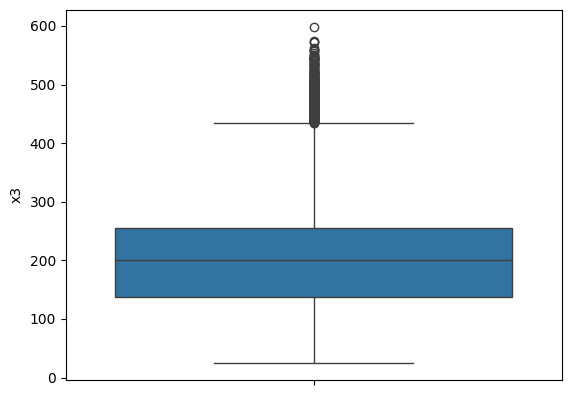

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


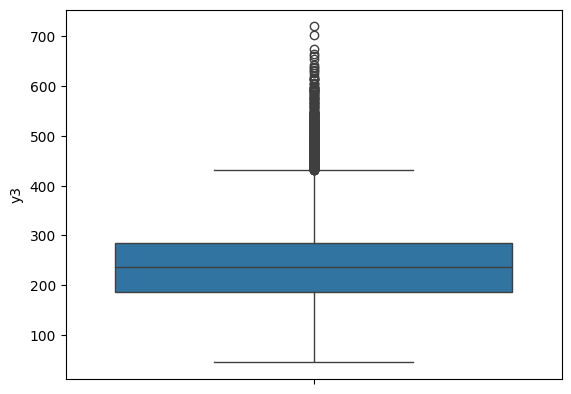

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


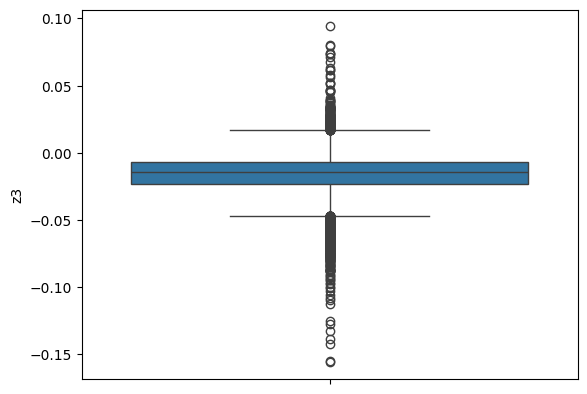

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


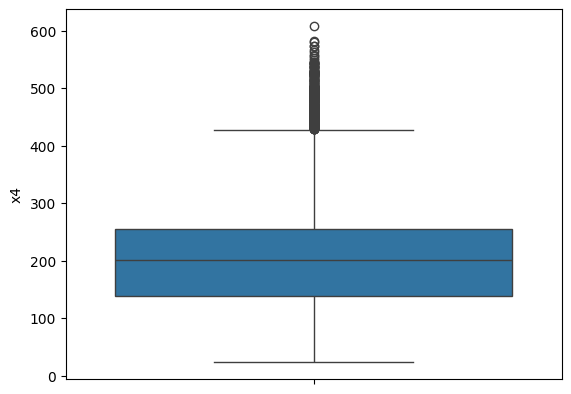

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


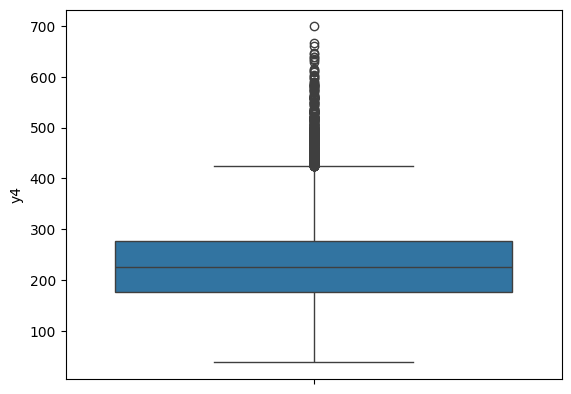

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


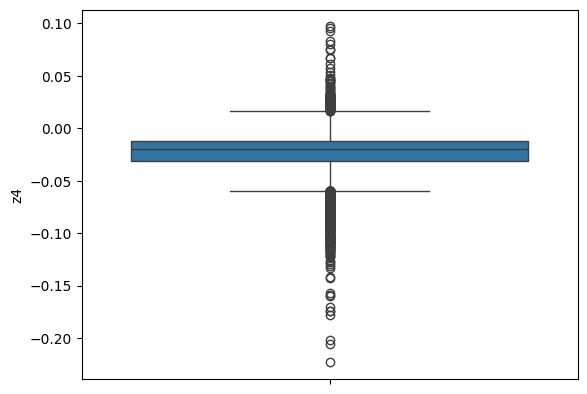

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


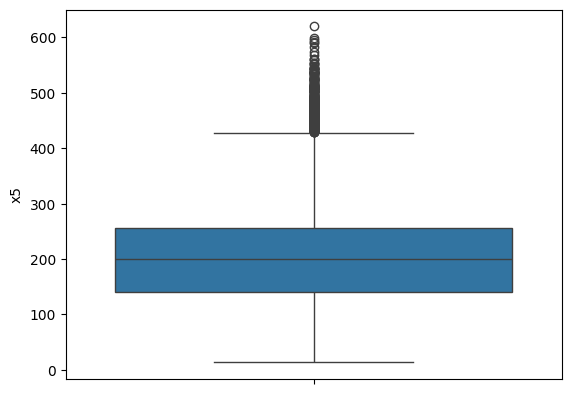

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


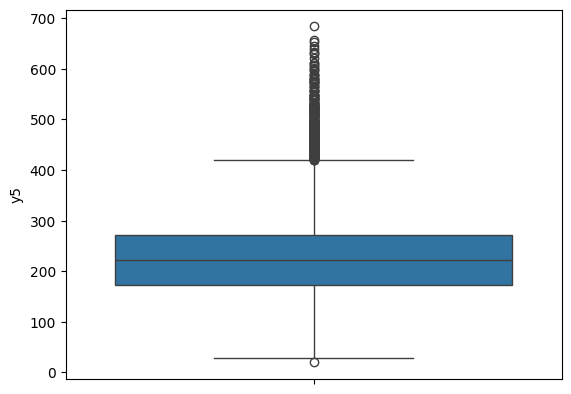

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


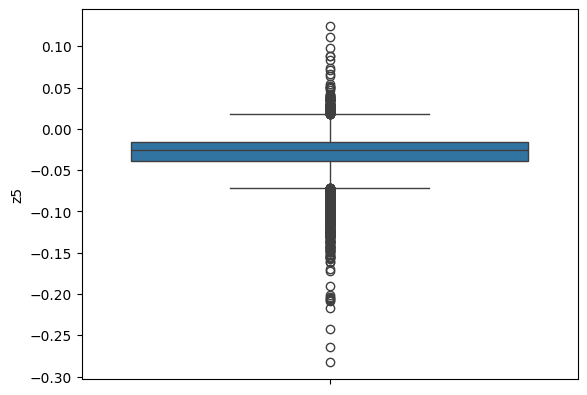

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


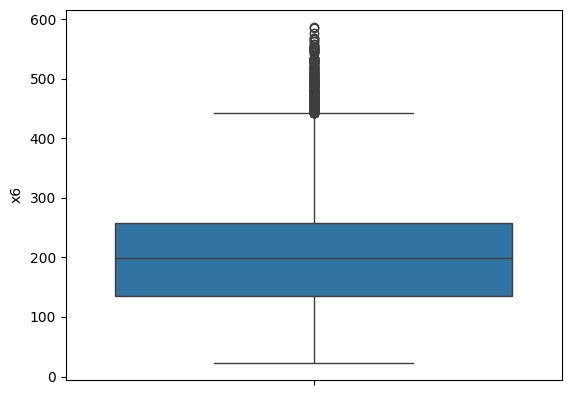

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


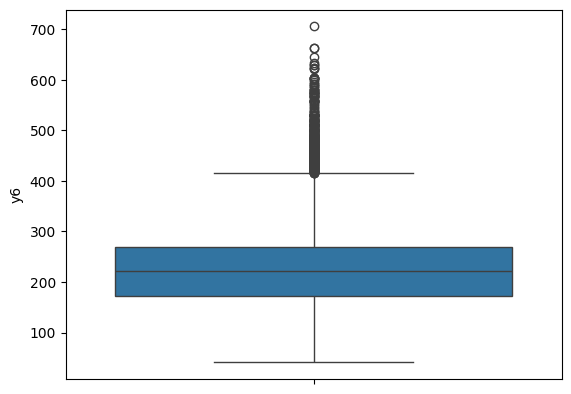

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


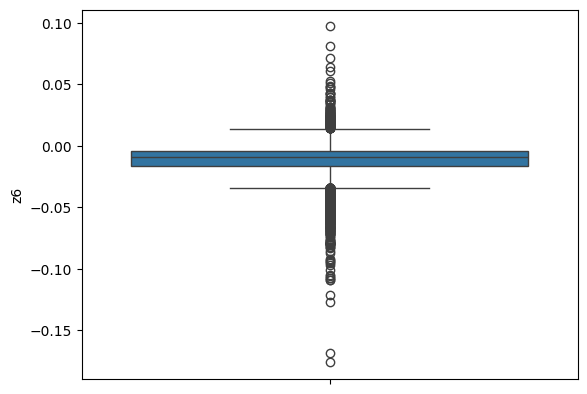

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


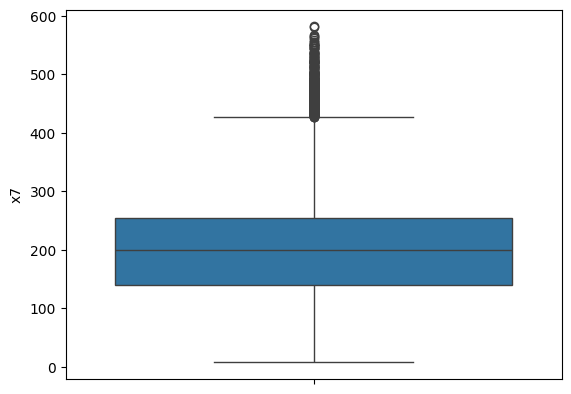

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


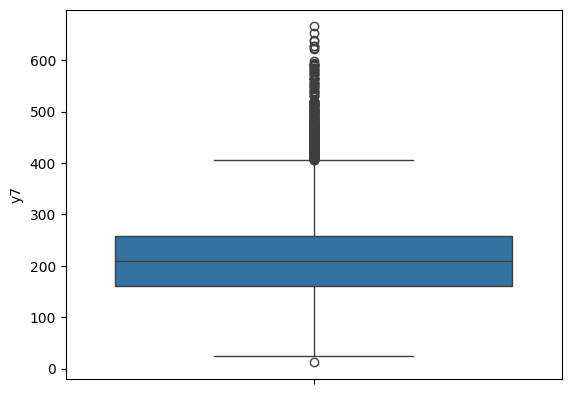

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


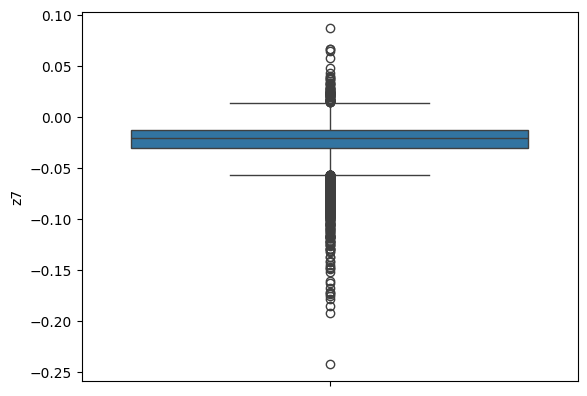

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


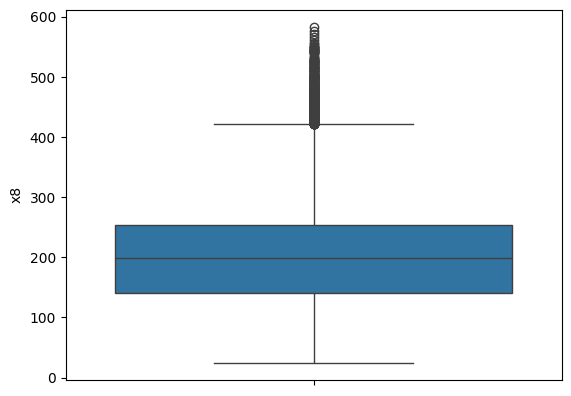

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


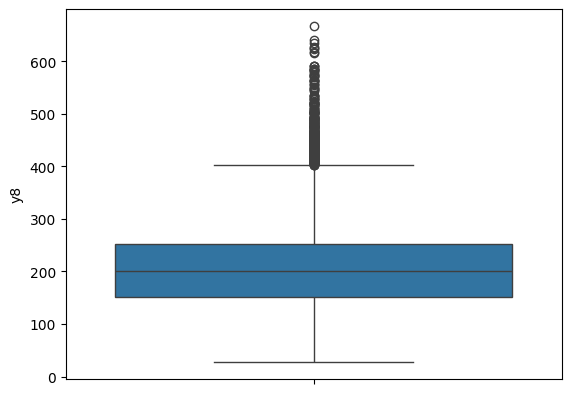

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


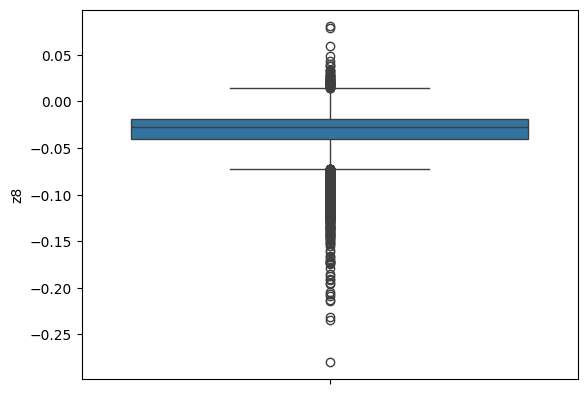

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


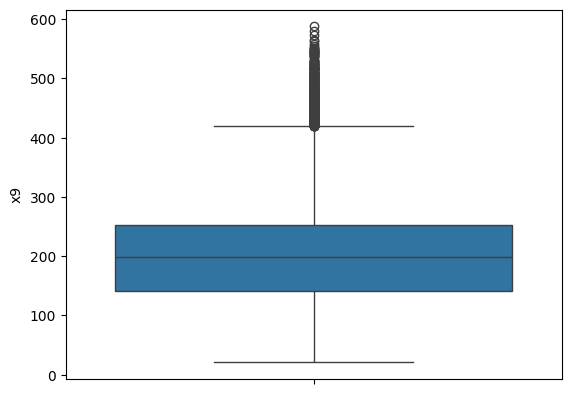

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


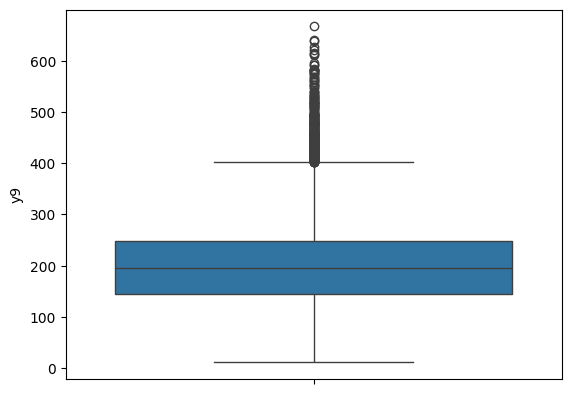

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


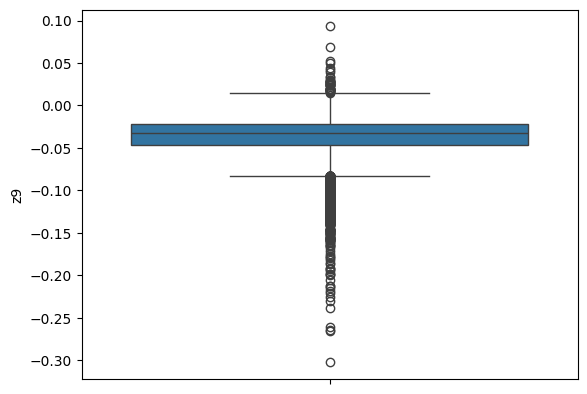

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


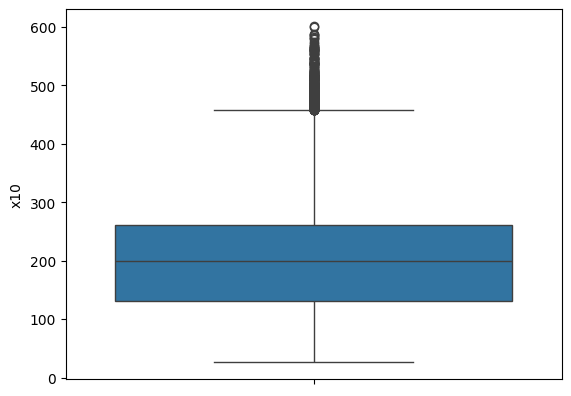

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


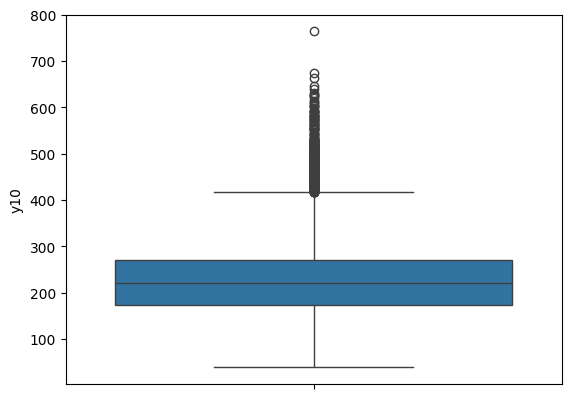

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


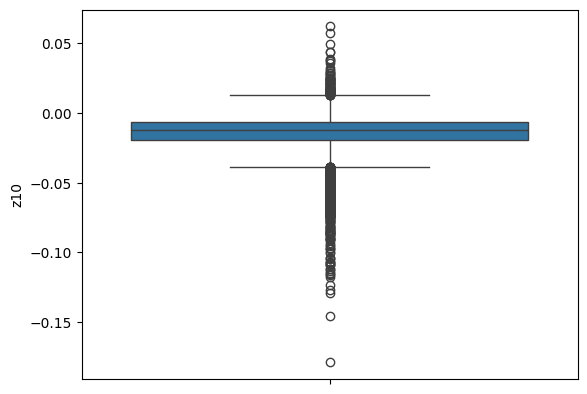

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


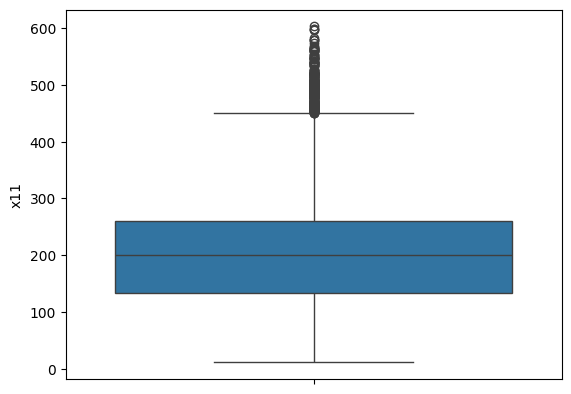

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


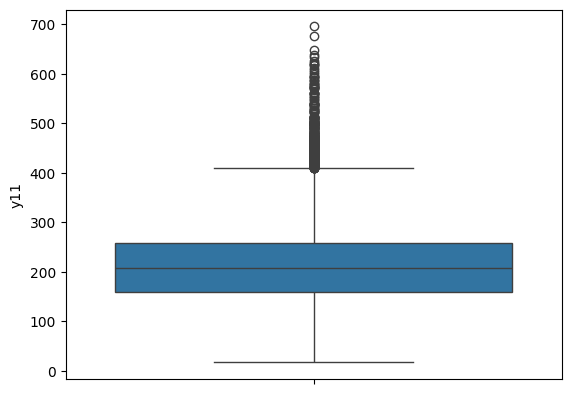

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


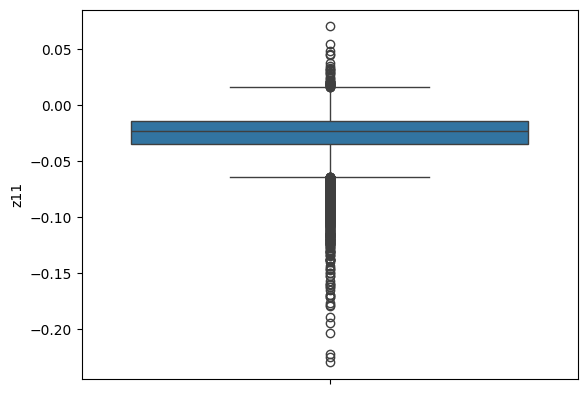

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


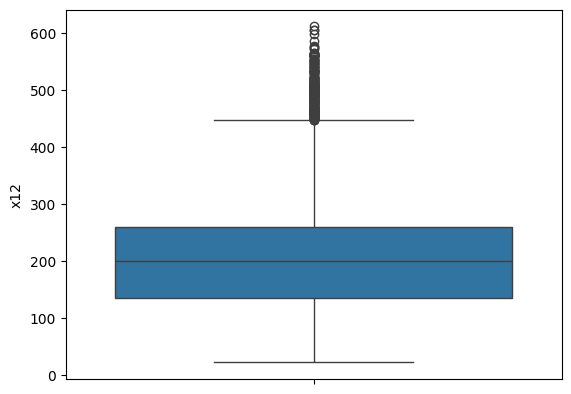

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


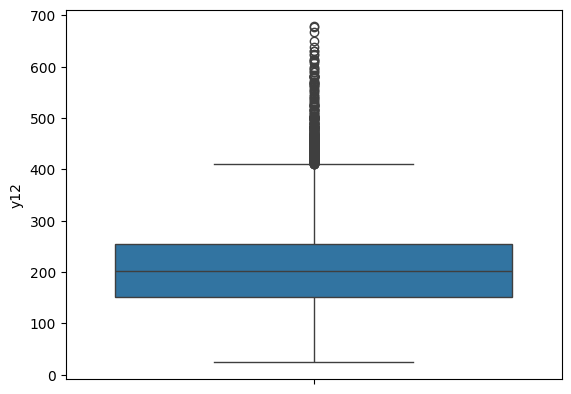

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


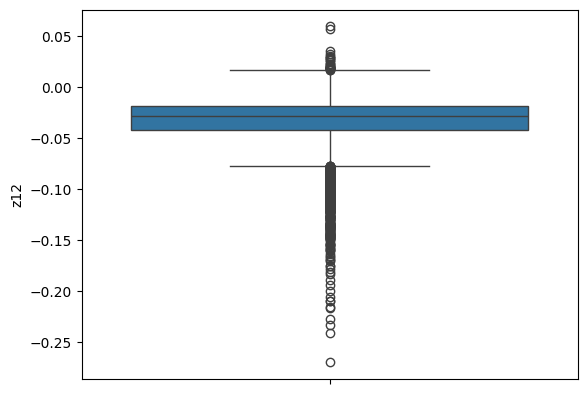

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


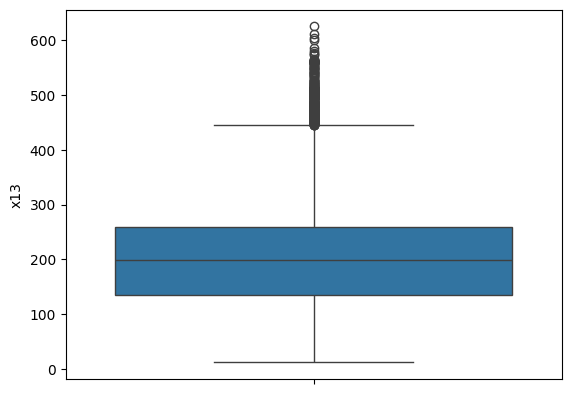

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


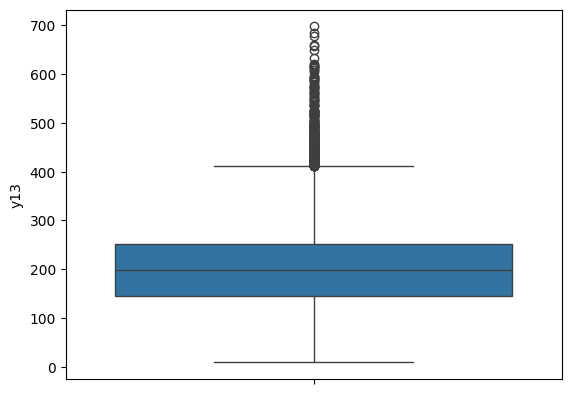

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


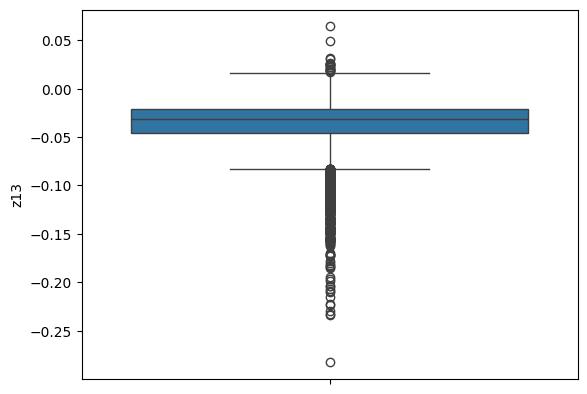

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


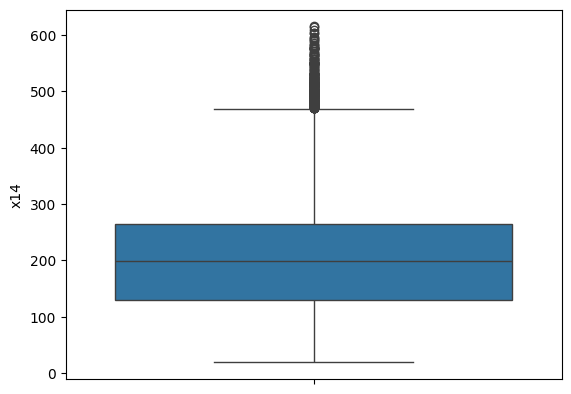

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


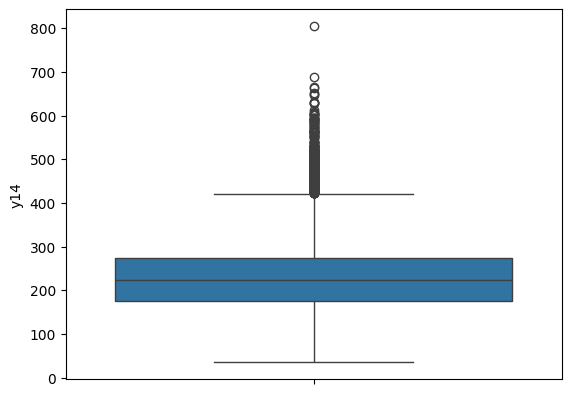

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


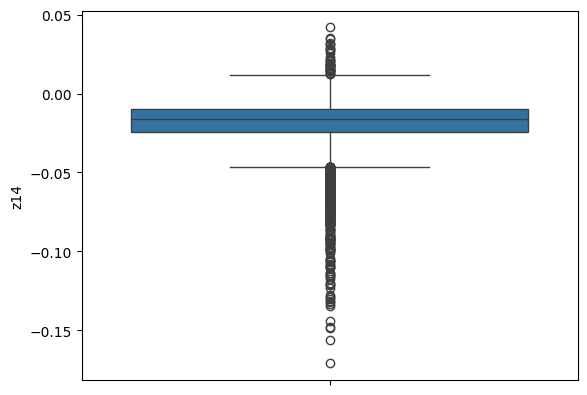

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


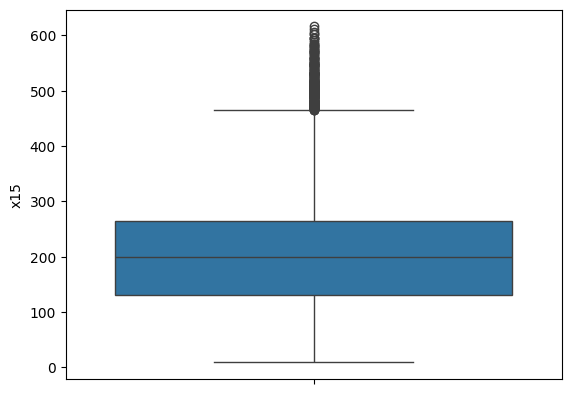

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


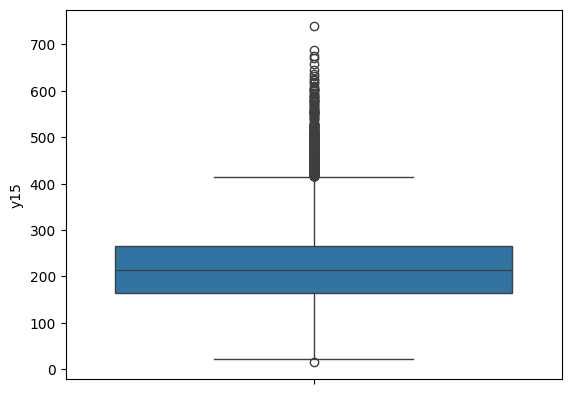

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


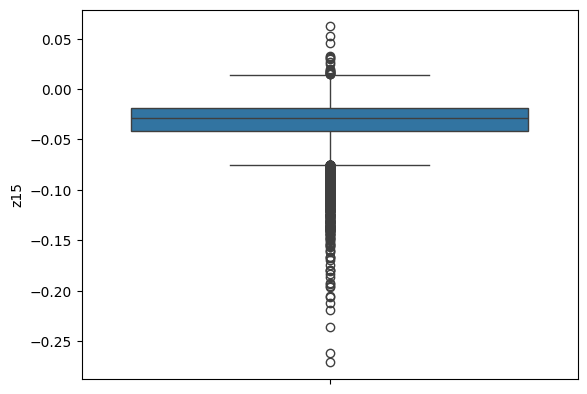

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


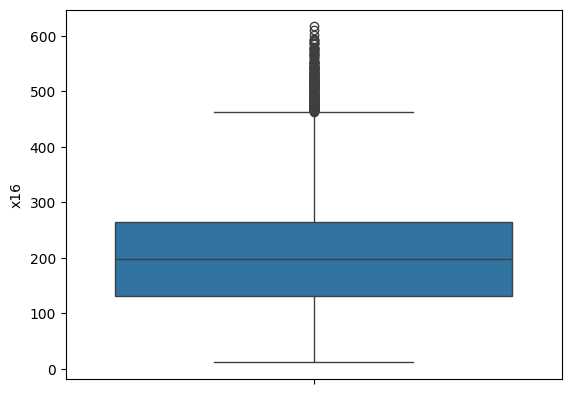

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


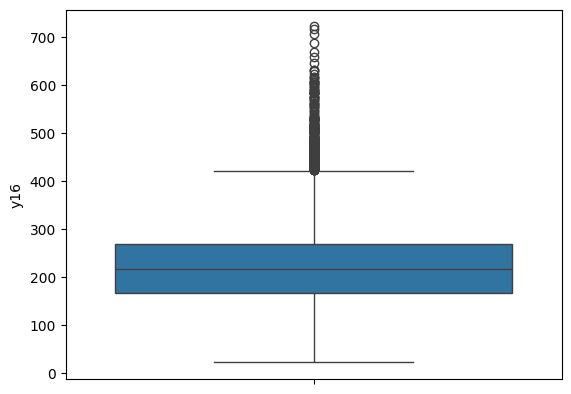

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


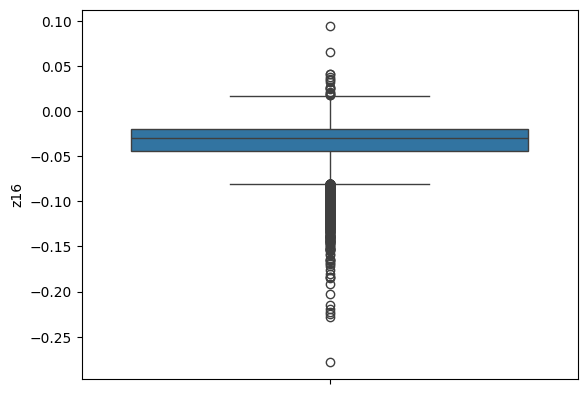

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


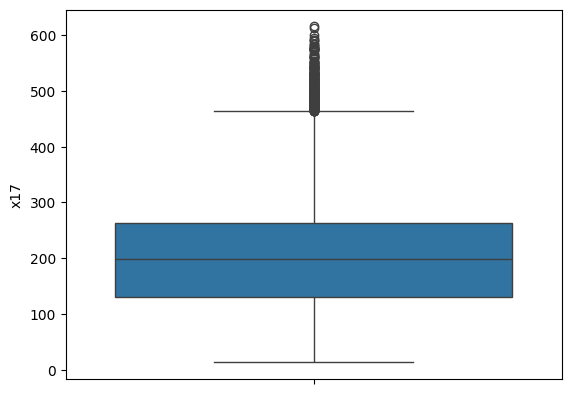

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


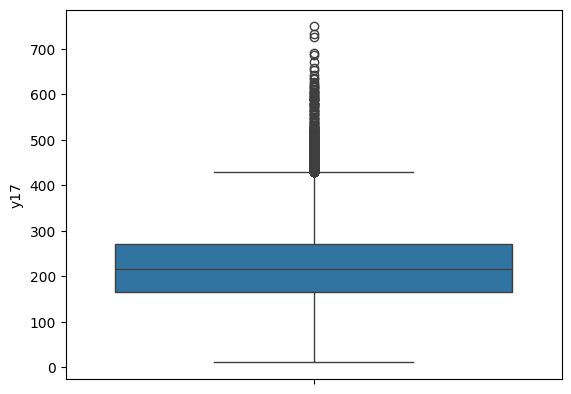

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


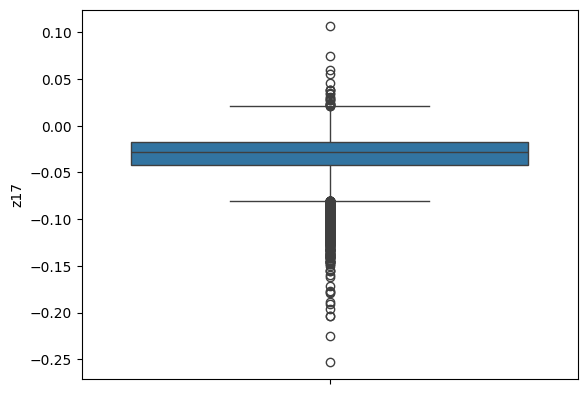

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


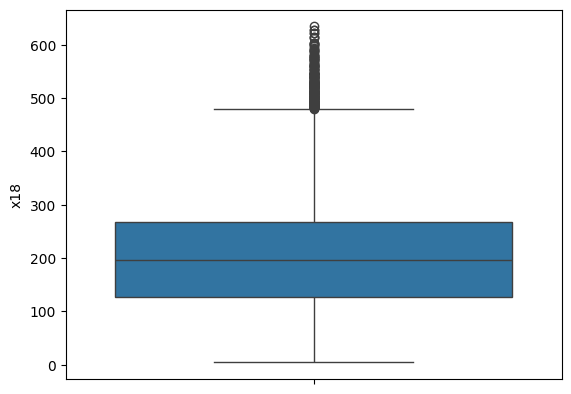

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


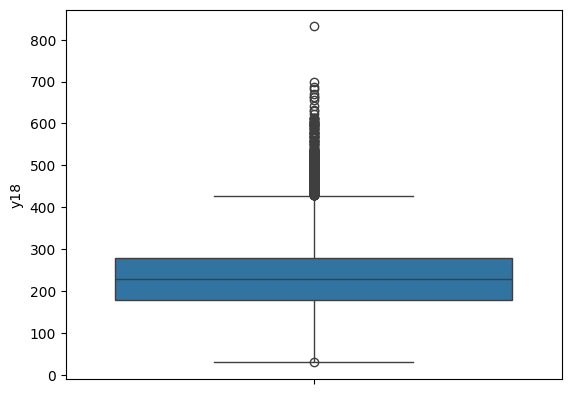

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


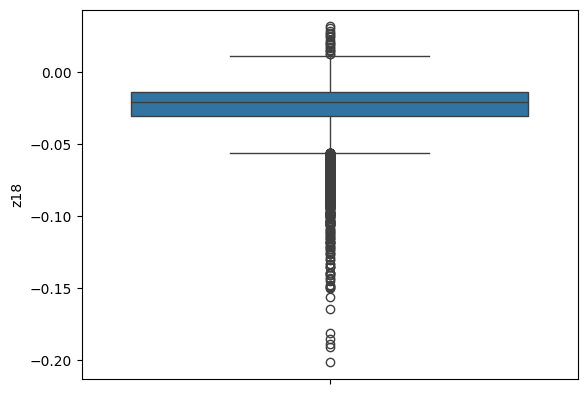

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


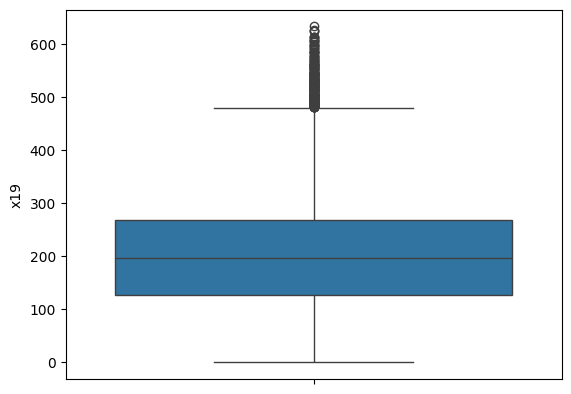

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


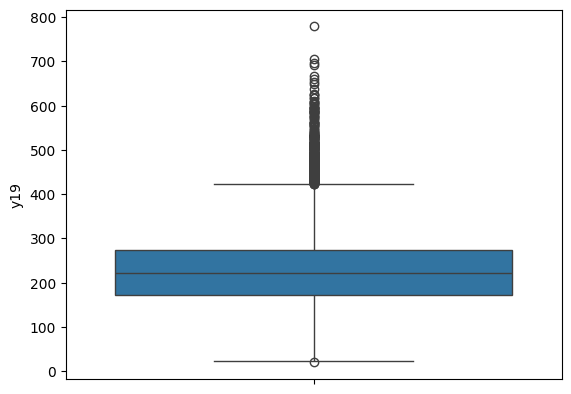

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


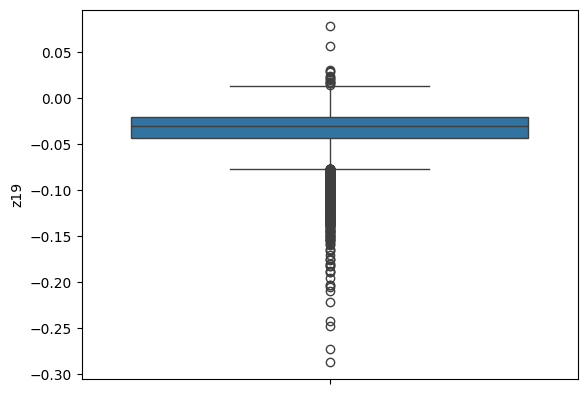

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


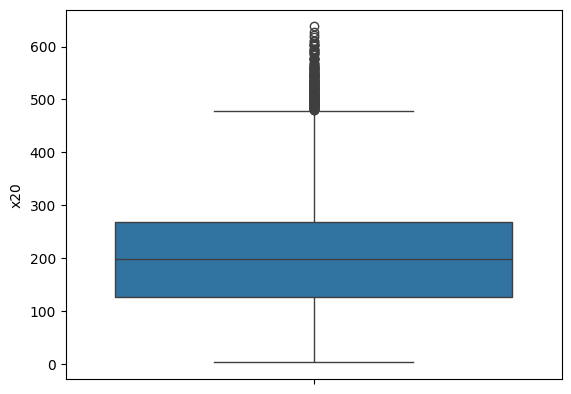

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


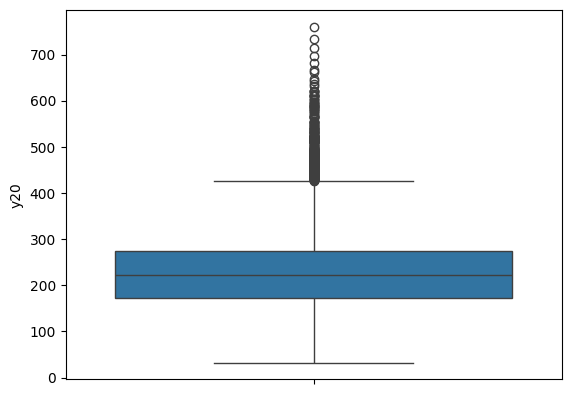

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


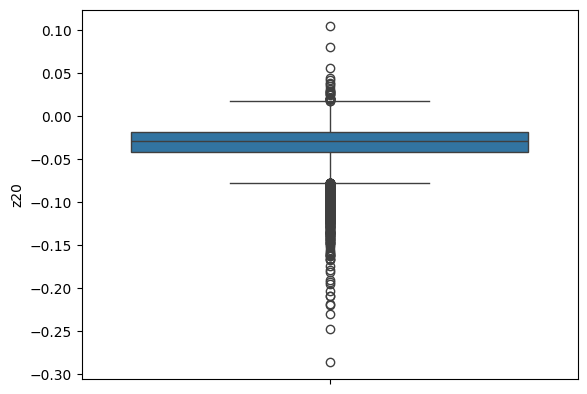

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


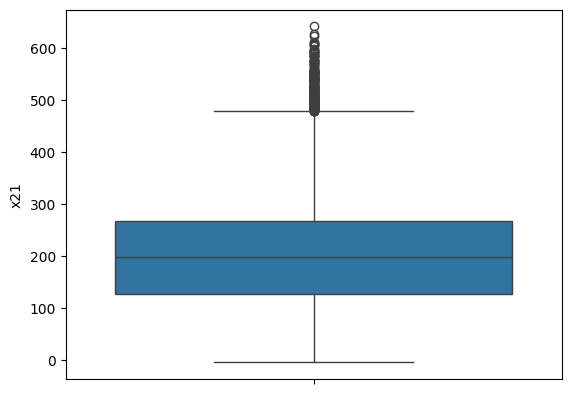

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


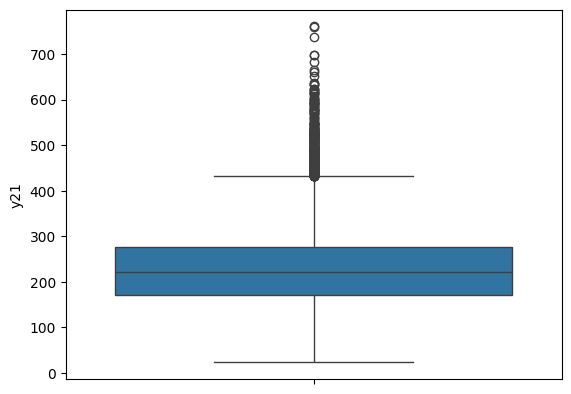

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


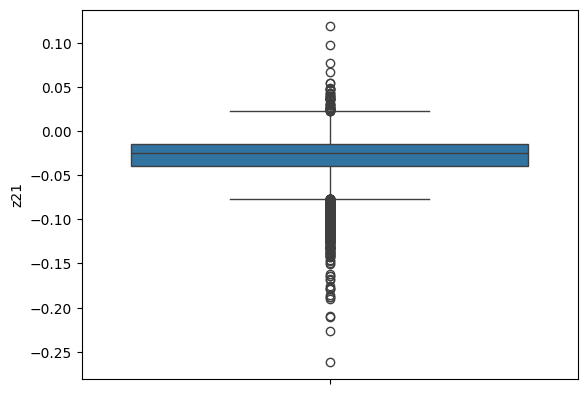

In [14]:
#Draw Box blot to show outlier
for i in df.select_dtypes("float64"):
    sns.boxplot(data=df,y=i,orient="h")
    plt.show()

### From The Box plot visualization we have many many outlier at our data
#### So this my approach to takle this problem 
- Use Scaling at GD Based Models
- Use Roubest model `Trees , Ensample models`
- Try make Transformation

In [5]:
#Print unique value at Label class
print(df["label"].unique())

['call' 'dislike' 'fist' 'four' 'like' 'mute' 'ok' 'one' 'palm' 'peace'
 'peace_inverted' 'rock' 'stop' 'stop_inverted' 'three' 'three2' 'two_up'
 'two_up_inverted']


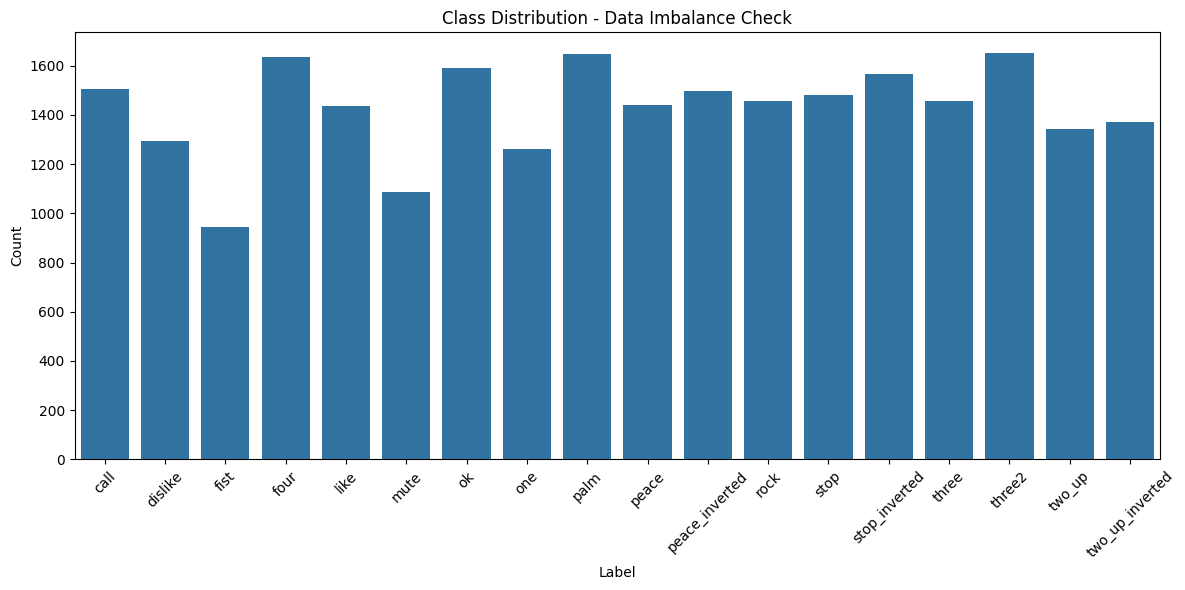

In [21]:
#Check Data imbalance
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="label")
plt.xticks(rotation=45)
plt.title("Class Distribution - Data Imbalance Check")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

### it seem that this data not completely balanced

## Preprocessing Part

In [19]:
#Take Copy from DataFrame
df_copy=df.copy()

In [20]:
#split data into train and test and validation
X=df_copy.drop("label",axis=1)
y=df_copy["label"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [21]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=42,stratify=y_train)

In [22]:
# Encode labels as integers using LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)

In [12]:
def scale_landmarks(X):
    X_scaled = X.copy()
    
    # Wrist is landmark 1 in your data (equivalent to MediaPipe landmark 0)
    wrist_x = X_scaled['x1'].copy()
    wrist_y = X_scaled['y1'].copy()
    
    # Middle finger tip is landmark 13 in your data (equivalent to MediaPipe landmark 12)
    mid_tip_x = X_scaled['x13'].copy() - wrist_x
    mid_tip_y = X_scaled['y13'].copy() - wrist_y
    
    # Avoid division by zero
    mid_tip_x = mid_tip_x.replace(0, 1e-6)
    mid_tip_y = mid_tip_y.replace(0, 1e-6)
    
    # Scale all landmarks (2-21, since we'll drop landmark 1)
    for i in range(2, 22):
        X_scaled[f'x{i}'] = (X_scaled[f'x{i}'] - wrist_x) / mid_tip_x
        X_scaled[f'y{i}'] = (X_scaled[f'y{i}'] - wrist_y) / mid_tip_y
        # z coordinates remain unchanged
    
    return X_scaled.drop(['x1', 'y1'], axis=1)

X_train_scaled = scale_landmarks(X_train)
X_val_scaled = scale_landmarks(X_val)
X_test_scaled = scale_landmarks(X_test)

In [13]:
X_train_scaled.head()

,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
4215,6.499353e-07,5.511691,0.073700,-0.038618,7.986715,0.216153,-0.057462,3.291646,0.347375,-0.071053,...,-0.050508,-11.913313,0.544203,-0.074966,-14.455983,0.644814,-0.086287,-16.776781,0.738838,-0.091268
5851,-1.499911e-08,0.117565,1.325755,-0.007012,0.372466,2.592564,-0.017089,0.521635,3.696158,-0.026768,...,-0.025517,1.267138,-0.363167,-0.024309,1.105376,-0.384675,-0.014770,0.946085,-0.452740,-0.007543
11997,2.388397e-07,3.712627,0.064667,-0.013317,6.876241,0.155491,-0.022635,8.911446,0.230056,-0.032138,...,-0.023276,-4.707931,0.556959,-0.031109,-5.527462,0.646177,-0.033896,-5.965691,0.735676,-0.035411
24680,2.007904e-07,-0.893180,0.184706,0.002501,-0.250472,0.374984,-0.001134,1.237735,0.467126,-0.006940,...,-0.031612,3.789674,0.389516,-0.033093,3.547116,0.325940,-0.027491,3.038820,0.285838,-0.022271
4599,1.853224e-07,19.013700,0.097692,-0.009820,27.993372,0.252176,-0.013866,22.246097,0.389772,-0.017080,...,-0.014852,-39.312821,0.534524,-0.022743,-47.465348,0.630939,-0.027263,-54.028315,0.713437,-0.029767


## Modeling Part

### Logisitic Regression

In [18]:
#Train Logistic Regression with gini criterion
log_reg = LogisticRegression(max_iter=200,class_weight="balanced",random_state=42)
log_reg.fit(X_train, y_train_encoded)

LogisticRegression(class_weight='balanced', max_iter=200, random_state=42)

In [ ]:
track_model(log_reg,"LogisticRegression_with_scaling_by_Coordenates", X_train_scaled, y_train_encoded, X_val_scaled, y_val_encoded, "Hand-Landmark-Recognition")

2026/02/11 19:57:44 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


[MLflow] 'LogisticRegression_without_scaling' | accuracy=0.7649 | f1=0.7633


'7a1434a199eb4be9b4836d8a2c425a39'

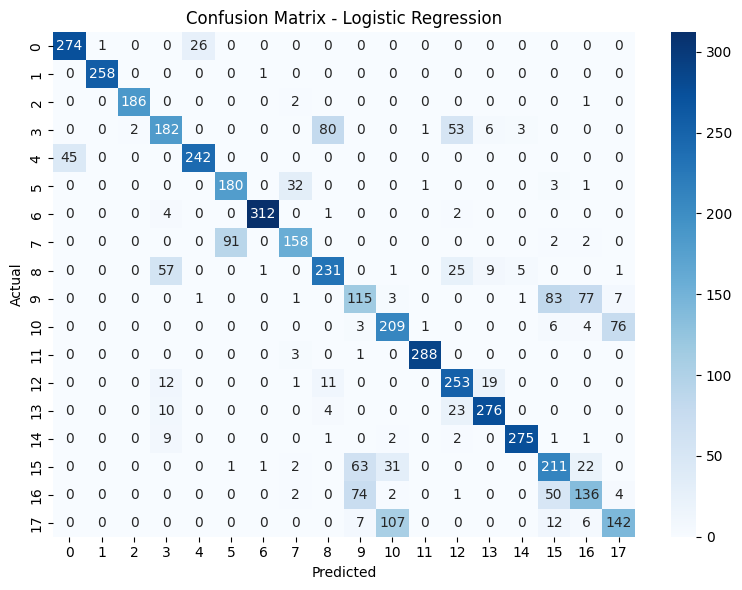

In [16]:
#add confusion matrix as artifact
y_val_pred = log_reg.predict(X_val)
cm = confusion_matrix(y_val_encoded, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("confusion_matrix.png")
plt.tight_layout()

In [17]:
add_artifact(run_id="55eb0ac40d614b468e3880f63586edbf",artifact_path="confusion_matrix.png",local_path="confusion_matrix.png")

[MLflow] Added artifact 'confusion_matrix.png' to run 55eb0ac40d614b468e3880f63586edbf under 'confusion_matrix.png'


In [19]:
#Train Logistic Regression with different hyperparameters
log_reg = LogisticRegression(max_iter=1000, C=0.1, penalty='l2', solver='lbfgs',class_weight="balanced",random_state=42)
log_reg.fit(X_train, y_train_encoded)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [23]:
#see results of Logistic Regression
y_pred_log_reg = log_reg.predict(X_val)
print("Classification Report for Logistic Regression:")
print(classification_report(y_val_encoded, y_pred_log_reg))
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix(y_val_encoded, y_pred_log_reg))
print("Accuracy for Logistic Regression:", accuracy_score(y_val_encoded, y_pred_log_reg))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       301
           1       1.00      1.00      1.00       259
           2       0.99      0.98      0.99       189
           3       0.66      0.56      0.61       327
           4       0.90      0.84      0.87       287
           5       0.66      0.83      0.74       217
           6       0.99      0.98      0.98       319
           7       0.79      0.62      0.70       253
           8       0.70      0.70      0.70       330
           9       0.44      0.40      0.42       288
          10       0.59      0.70      0.64       299
          11       0.99      0.99      0.99       292
          12       0.70      0.85      0.77       296
          13       0.89      0.88      0.89       313
          14       0.97      0.95      0.96       291
          15       0.57      0.64      0.60       331
          16       0.54      0.51 

In [21]:
#f1or Logistic Regression
log_reg_f1 = f1_score(y_val_encoded, y_pred_log_reg, average='macro')
print("F1 Score for Logistic Regression:", log_reg_f1)

F1 Score for Logistic Regression: 0.8538644369566204


In [23]:
track_model(log_reg,"LogisticRegression_model_with_scaling", X_train, y_train_encoded, X_val, y_val_encoded, "Hand-Landmark-Recognition")

2026/02/11 20:02:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


[MLflow] 'LogisticRegression_model_with_scaling' | accuracy=0.8508 | f1=0.8512


'cd31baa17eb342e9b4099ae2321612a5'

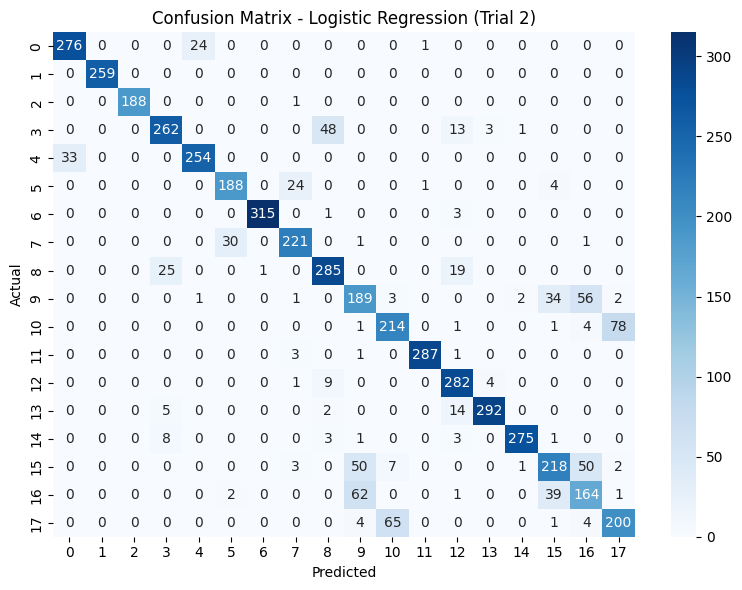

In [24]:
#add artifact confusion matrix for second trial
y_val_pred = log_reg.predict(X_val)
cm = confusion_matrix(y_val_encoded, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Trial 2)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("confusion_matrix_trial2.png")
plt.tight_layout()
plt.show()

In [25]:
add_artifact(run_id="cd31baa17eb342e9b4099ae2321612a5",artifact_path="confusion_matrix_trial2.png",local_path="confusion_matrix_trial2.png")

[MLflow] Added artifact 'confusion_matrix_trial2.png' to run cd31baa17eb342e9b4099ae2321612a5 under 'confusion_matrix_trial2.png'


In [ ]:
#make grid search for Logistic Regression
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=200), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)
print("Best Hyperparameters for Logistic Regression:", grid_search.best_params_)
best_log_reg = grid_search.best_estimator_
print("Best Logistic Regression Model:", best_log_reg)

In [ ]:
y_pred_best_log_reg = best_log_reg.predict(X_val)
print("Classification Report for Best Logistic Regression:")
print(classification_report(y_val_encoded, y_pred_best_log_reg))
print("Confusion Matrix for Best Logistic Regression:")
print(confusion_matrix(y_val_encoded, y_pred_best_log_reg))
print("Accuracy for Best Logistic Regression:", accuracy_score(y_val_encoded, y_pred_best_log_reg))

### Random Forest

In [24]:
#try random forest with criterion gini and max depth None and n_estimators 200
rf = RandomForestClassifier(n_estimators=200, criterion='gini', max_depth=None)
rf.fit(X_train_scaled, y_train_encoded)

RandomForestClassifier(n_estimators=200)

In [25]:
#see results of Random Forest
y_pred_rf = rf.predict(X_val_scaled)
print("Classification Report for Random Forest:")
print(classification_report(y_val_encoded, y_pred_rf))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_val_encoded, y_pred_rf))
print("Accuracy for Random Forest:", accuracy_score(y_val_encoded, y_pred_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       301
           1       0.98      0.98      0.98       259
           2       1.00      0.99      0.99       189
           3       0.97      0.94      0.95       327
           4       0.97      0.97      0.97       287
           5       0.98      0.99      0.99       217
           6       1.00      0.99      0.99       319
           7       0.97      0.97      0.97       253
           8       0.93      0.95      0.94       330
           9       0.92      0.93      0.93       288
          10       0.98      0.95      0.97       299
          11       0.99      0.98      0.99       292
          12       0.91      0.97      0.94       296
          13       0.99      0.98      0.99       313
          14       0.99      0.96      0.98       291
          15       0.98      0.99      0.98       331
          16       0.94      0.91      0

In [ ]:
#see results of Random Forest
y_pred_rf = rf.predict(X_val)
print("Classification Report for Random Forest:")
print(classification_report(y_val_encoded, y_pred_rf))
print("Confusion Matrix for Random Forest:")
print(confusion_matrix(y_val_encoded, y_pred_rf))
print("Accuracy for Random Forest:", accuracy_score(y_val_encoded, y_pred_rf))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       301
           1       0.94      0.95      0.95       259
           2       0.94      0.92      0.93       189
           3       0.74      0.74      0.74       327
           4       0.97      0.91      0.94       287
           5       0.92      0.95      0.94       217
           6       0.98      0.97      0.97       319
           7       0.93      0.87      0.90       253
           8       0.73      0.78      0.76       330
           9       0.58      0.56      0.57       288
          10       0.70      0.76      0.73       299
          11       0.93      0.96      0.95       292
          12       0.75      0.84      0.79       296
          13       0.92      0.97      0.94       313
          14       0.95      0.80      0.87       291
          15       0.82      0.84      0.83       331
          16       0.62      0.58      0

In [ ]:
#fine tune random forest with grid search
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20]
}
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train_encoded)
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_
print("Best Random Forest Model:", best_rf)

In [26]:
#track random forest model at new run
track_model(rf,"RandomForest_model_with_scaling_by_coordentas", X_train_scaled, y_train_encoded, X_val_scaled, y_val_encoded, "Hand-Landmark-Recognition")

2026/02/12 23:20:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


[MLflow] 'RandomForest_model_with_scaling_by_coordentas' | accuracy=0.9671 | f1=0.9672


'9b35d26868e14b02a038b63b95c6dae1'

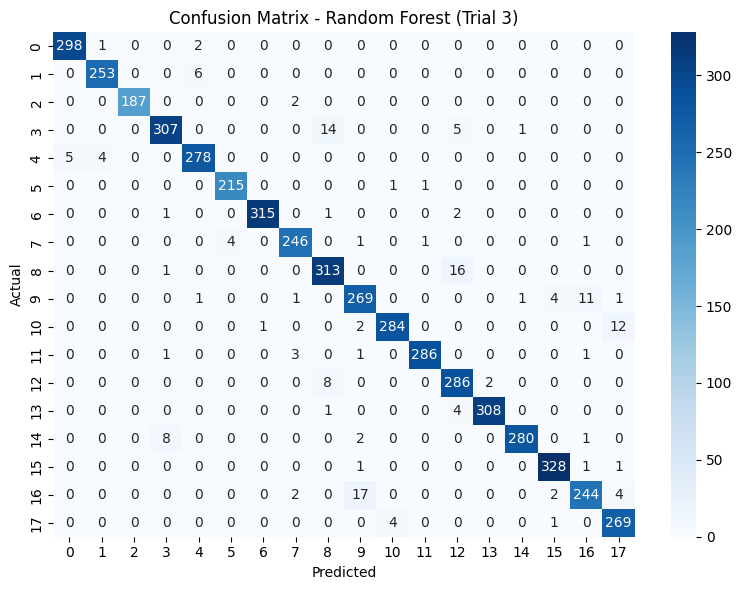

In [27]:
#add artifact confusion matrix for second trial
y_val_pred = rf.predict(X_val_scaled)
cm = confusion_matrix(y_val_encoded, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest (Trial 3)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("confusion_matrix_trial3.png")
plt.tight_layout()

In [28]:
#add artifact
add_artifact(run_id="9b35d26868e14b02a038b63b95c6dae1",artifact_path="confusion_matrix_rf.png",local_path="confusion_matrix_trial3.png")

[MLflow] Added artifact 'confusion_matrix_trial3.png' to run 9b35d26868e14b02a038b63b95c6dae1 under 'confusion_matrix_rf.png'


### Trying SVM

In [ ]:
#Try SVM
svm_clf = SVC(kernel='rbf', probability=True,gamma='scale' ,C=100)
svm_clf.fit(X_train, y_train_encoded)

SVC(C=100, probability=True)

In [30]:
#see results of svm
y_pred_svm = svm_clf.predict(X_val)
print("Classification Report for SVM:")
print(classification_report(y_val_encoded, y_pred_svm))
print("Confusion Matrix for SVM:")
print(confusion_matrix(y_val_encoded, y_pred_svm))
print("Accuracy for SVM:", accuracy_score(y_val_encoded, y_pred_svm))

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       301
           1       1.00      1.00      1.00       259
           2       0.99      0.99      0.99       189
           3       0.87      0.97      0.91       327
           4       0.95      0.94      0.94       287
           5       0.92      0.95      0.94       217
           6       1.00      0.98      0.99       319
           7       0.94      0.93      0.94       253
           8       0.97      0.89      0.93       330
           9       0.88      0.91      0.90       288
          10       0.95      0.88      0.91       299
          11       1.00      0.98      0.99       292
          12       0.90      0.95      0.92       296
          13       0.97      0.94      0.95       313
          14       0.99      0.96      0.97       291
          15       0.99      0.96      0.97       331
          16       0.92      0.88      0.90       

In [13]:
#f1 for SVM
svm_f1 = f1_score(y_val_encoded, y_pred_svm, average='weighted')
print("F1 Score for SVM:", svm_f1)

F1 Score for SVM: 0.9418613338653589


In [31]:
#track SVM model at new run
track_model(svm_clf,"SVM_model_without_scaled_data", X_train, y_train_encoded, X_val, y_val_encoded, "Hand-Landmark-Recognition")

2026/02/11 20:09:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


[MLflow] 'SVM_model_without_scaled_data' | accuracy=0.9445 | f1=0.9447


'b7b21ed17bfa495cb43e4dc4f2f618f8'

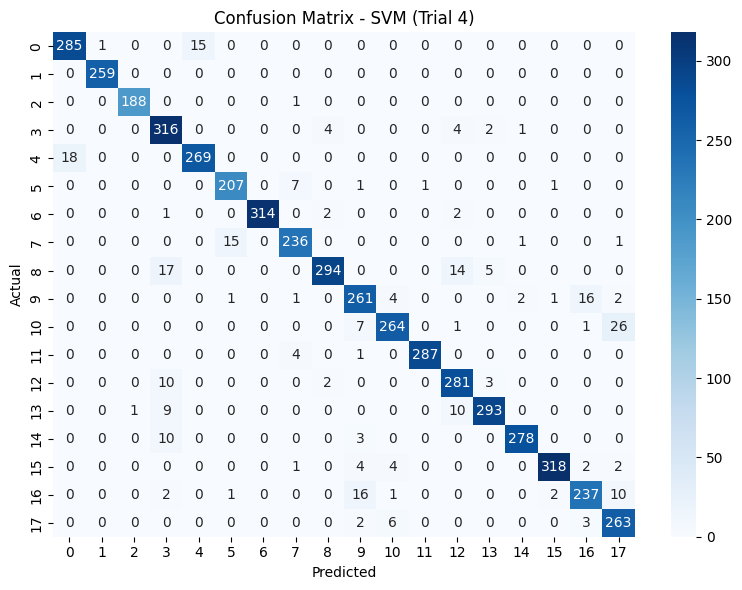

In [32]:
#add svm confusion matrix as artifact
y_val_pred = svm_clf.predict(X_val)
cm = confusion_matrix(y_val_encoded, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM (Trial 4)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("confusion_matrix_svm.png")
plt.tight_layout()

In [33]:
add_artifact(run_id="b7b21ed17bfa495cb43e4dc4f2f618f8",artifact_path="confusion_matrix_svm.png",local_path="confusion_matrix_svm.png")

[MLflow] Added artifact 'confusion_matrix_svm.png' to run b7b21ed17bfa495cb43e4dc4f2f618f8 under 'confusion_matrix_svm.png'


### The cell below to be run in colab due to high compution

In [ ]:
#Try to make hyperparameter tuning for SVM
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'kernel': ['rbf', 'poly', 'linear', 'sigmoid']
}
grid_search = GridSearchCV(SVC(probability=True), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train_encoded)

### Decision Tree

In [32]:
#try decision tree
dt_clf = DecisionTreeClassifier(random_state=42,max_depth=100,min_samples_split=10,min_samples_leaf=2)
dt_clf.fit(X_train_scaled, y_train_encoded)

DecisionTreeClassifier(max_depth=100, min_samples_leaf=2, min_samples_split=10,
                       random_state=42)

In [34]:
#see results of decision tree
y_pred_dt = dt_clf.predict(X_val_scaled)
print("Classification Report for Decision Tree:")
print(classification_report(y_val_encoded, y_pred_dt))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_val_encoded, y_pred_dt))
print("Accuracy for Decision Tree:", accuracy_score(y_val_encoded, y_pred_dt))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       301
           1       0.91      0.95      0.93       259
           2       0.97      0.99      0.98       189
           3       0.91      0.92      0.92       327
           4       0.96      0.90      0.93       287
           5       0.95      0.95      0.95       217
           6       1.00      0.98      0.99       319
           7       0.94      0.97      0.96       253
           8       0.89      0.88      0.89       330
           9       0.83      0.92      0.87       288
          10       0.90      0.91      0.91       299
          11       0.98      0.98      0.98       292
          12       0.84      0.89      0.86       296
          13       0.97      0.95      0.96       313
          14       0.97      0.94      0.96       291
          15       0.96      0.93      0.94       331
          16       0.93      0.85      0

In [35]:
#see results of decision tree
y_pred_dt = dt_clf.predict(X_val)
print("Classification Report for Decision Tree:")
print(classification_report(y_val_encoded, y_pred_dt))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(y_val_encoded, y_pred_dt))
print("Accuracy for Decision Tree:", accuracy_score(y_val_encoded, y_pred_dt))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       301
           1       0.70      0.80      0.75       259
           2       0.78      0.79      0.79       189
           3       0.54      0.60      0.57       327
           4       0.82      0.78      0.80       287
           5       0.76      0.77      0.76       217
           6       0.77      0.77      0.77       319
           7       0.73      0.72      0.73       253
           8       0.59      0.59      0.59       330
           9       0.49      0.56      0.52       288
          10       0.66      0.66      0.66       299
          11       0.85      0.80      0.82       292
          12       0.66      0.70      0.68       296
          13       0.84      0.76      0.80       313
          14       0.73      0.64      0.68       291
          15       0.71      0.69      0.70       331
          16       0.52      0.45      0

In [35]:
#track decision tree model at new run
track_model(dt_clf,"DecisionTree_model_with_coordontes_scale", X_train_scaled, y_train_encoded, X_val_scaled, y_val_encoded, "Hand-Landmark-Recognition")

2026/02/12 23:37:34 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


[MLflow] 'DecisionTree_model_with_coordontes_scale' | accuracy=0.9307 | f1=0.9309


'619205b034424d84918abb63124d4b80'

In [ ]:
#fine tune decision tree with grid search
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train_encoded)
print("Best Hyperparameters for Decision Tree:", grid_search_dt.best_params_)
best_dt = grid_search_dt.best_estimator_
print("Best Decision Tree Model:", best_dt)

In [36]:
# Try XGBoost
from xgboost import XGBClassifier
xgb_clf = XGBClassifier(random_state=42, n_estimators=100, max_depth=100, min_samples_split=10, min_samples_leaf=2, use_label_encoder=False, eval_metric='mlogloss')
xgb_clf.fit(X_train_scaled, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, min_samples_leaf=2, min_samples_split=10,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=100, ...)

In [37]:
#see results of XGBoost
y_pred_xgb = xgb_clf.predict(X_val_scaled)
print("Classification Report for XGBoost:")
print(classification_report(y_val_encoded, y_pred_xgb))
print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_val_encoded, y_pred_xgb))
print("Accuracy for XGBoost:", accuracy_score(y_val_encoded, y_pred_xgb))

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       301
           1       0.98      0.98      0.98       259
           2       0.99      0.99      0.99       189
           3       0.97      0.96      0.96       327
           4       0.99      0.98      0.98       287
           5       0.97      0.99      0.98       217
           6       0.99      0.99      0.99       319
           7       0.97      0.96      0.96       253
           8       0.95      0.95      0.95       330
           9       0.93      0.94      0.94       288
          10       0.99      0.97      0.98       299
          11       1.00      0.98      0.99       292
          12       0.92      0.97      0.94       296
          13       0.99      0.99      0.99       313
          14       0.99      0.96      0.98       291
          15       0.98      0.99      0.98       331
          16       0.96      0.95      0.95   

In [37]:
#see results of XGBoost
y_pred_xgb = xgb_clf.predict(X_val)
print("Classification Report for XGBoost:")
print(classification_report(y_val_encoded, y_pred_xgb))
print("Confusion Matrix for XGBoost:")
print(confusion_matrix(y_val_encoded, y_pred_xgb))
print("Accuracy for XGBoost:", accuracy_score(y_val_encoded, y_pred_xgb))

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       301
           1       0.98      0.98      0.98       259
           2       0.96      0.97      0.97       189
           3       0.84      0.89      0.86       327
           4       0.94      0.92      0.93       287
           5       0.94      0.93      0.93       217
           6       1.00      0.96      0.98       319
           7       0.92      0.92      0.92       253
           8       0.85      0.85      0.85       330
           9       0.71      0.79      0.75       288
          10       0.86      0.83      0.85       299
          11       0.95      0.96      0.95       292
          12       0.83      0.89      0.86       296
          13       0.94      0.97      0.96       313
          14       0.97      0.91      0.94       291
          15       0.93      0.92      0.92       331
          16       0.78      0.70      0.74   

In [38]:
#print f1 for XGBoost
xgb_f1 = f1_score(y_val_encoded, y_pred_xgb, average='macro')
print("F1 Score for XGBoost:", xgb_f1)

F1 Score for XGBoost: 0.9733719942965445


In [39]:
#track xgboost model at new run
track_model(xgb_clf,"XGBoost_model_with_coordontes_scale", X_train_scaled, y_train_encoded, X_val_scaled, y_val_encoded, "Hand-Landmark-Recognition")

2026/02/12 23:44:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


[MLflow] 'XGBoost_model_with_coordontes_scale' | accuracy=0.9729 | f1=0.9730


'b6e7e0e6bff446618e7a9e219995f8c8'

[MLflow] Added artifact 'confusion_matrix_xgb.png' to run b6e7e0e6bff446618e7a9e219995f8c8 under 'confusion_matrix_xgb.png'


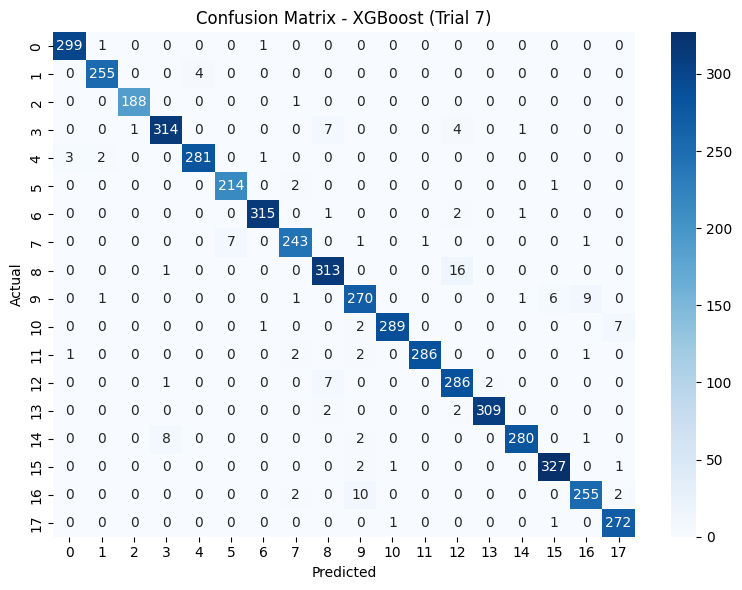

In [40]:
#add confuison matrix for xgboost as artifact
y_val_pred = xgb_clf.predict(X_val_scaled)
cm = confusion_matrix(y_val_encoded, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost (Trial 7)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("confusion_matrix_xgb.png")
plt.tight_layout()
add_artifact(run_id="b6e7e0e6bff446618e7a9e219995f8c8",artifact_path="confusion_matrix_xgb.png",local_path="confusion_matrix_xgb.png")

### Try Stacking

In [41]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('svm', SVC(kernel='rbf', probability=True, C=100, gamma='scale')),
        ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
        ('xgb', XGBClassifier(n_estimators=200, use_label_encoder=False,
                              eval_metric='mlogloss', random_state=42)),
    ],
    final_estimator=LogisticRegression(max_iter=1000),
    cv=5,
    n_jobs=-1
)
stacking_clf.fit(X_train_scaled, y_train_encoded)
print("Stacking Accuracy:", accuracy_score(y_val_encoded, stacking_clf.predict(X_val_scaled)))

/home/ahmed-fayad/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [23:46:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[23:58:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[23:58:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[23:58:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[23:58:07] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

[00:01:46] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



Stacking Accuracy: 0.97682570593963


In [42]:
#show results of stacking classifier
y_pred_stacking = stacking_clf.predict(X_val_scaled)
print("Classification Report for Stacking Classifier:")
print(classification_report(y_val_encoded, y_pred_stacking))
print("Confusion Matrix for Stacking Classifier:")
print(confusion_matrix(y_val_encoded, y_pred_stacking))
print("Accuracy for Stacking Classifier:", accuracy_score(y_val_encoded, y_pred_stacking))

Classification Report for Stacking Classifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       301
           1       0.98      0.99      0.99       259
           2       1.00      0.99      1.00       189
           3       0.97      0.96      0.96       327
           4       0.99      0.98      0.98       287
           5       0.98      1.00      0.99       217
           6       1.00      0.99      0.99       319
           7       0.97      0.97      0.97       253
           8       0.95      0.96      0.95       330
           9       0.94      0.96      0.95       288
          10       1.00      0.97      0.98       299
          11       1.00      0.98      0.99       292
          12       0.93      0.97      0.95       296
          13       1.00      0.99      0.99       313
          14       0.98      0.96      0.97       291
          15       0.99      0.99      0.99       331
          16       0.97      0.96 

In [43]:
# track stacking classifier at new run
track_model(stacking_clf,"Final_StackingClassifier_model_with_scaling_coordinates", X_train_scaled, y_train_encoded, X_val_scaled, y_val_encoded, "Hand-Landmark-Recognition")

2026/02/13 00:27:54 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


[MLflow] 'Final_StackingClassifier_model_with_scaling_coordinates' | accuracy=0.9768 | f1=0.9769


'b3bc3290f1e249449fe626c8d97a2381'

[MLflow] Added artifact 'confusion_matrix_stacking.png' to run b3bc3290f1e249449fe626c8d97a2381 under 'confusion_matrix_stacking.png'


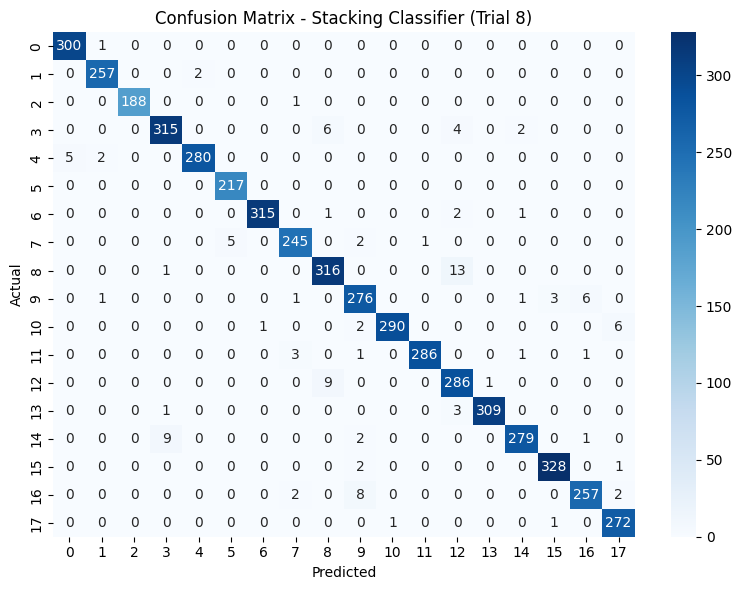

In [45]:
#add artifact confusion matrix for stacking classifier
y_val_pred = stacking_clf.predict(X_val_scaled)
cm = confusion_matrix(y_val_encoded, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Stacking Classifier (Trial 8)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("confusion_matrix_stacking.png")
plt.tight_layout()
add_artifact(run_id="b3bc3290f1e249449fe626c8d97a2381",artifact_path="confusion_matrix_stacking.png",local_path="confusion_matrix_stacking.png")

### Create Pipeline for winner model `Random Forest` and `Stacking Classifier`🎉🎉

In [33]:
df

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,...,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,...,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,...,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,...,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,...,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,...,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25670,259.135620,277.542236,4.323656e-07,271.098221,257.333374,0.007132,269.350250,237.538345,0.004480,257.334503,...,231.102150,230.308350,-0.028861,235.017242,235.029312,-0.016911,237.608711,240.918411,-0.006697,two_up_inverted
25671,90.063995,256.181732,3.808555e-07,77.302231,237.829132,0.003778,78.658888,220.471680,-0.001519,89.374163,...,116.692326,210.932007,-0.043690,112.681984,215.274353,-0.029510,110.178349,221.338379,-0.015630,two_up_inverted
25672,236.724518,251.496756,5.912488e-07,254.918358,232.369956,0.001354,256.002502,209.969106,-0.001674,247.075447,...,211.933777,202.389975,-0.031740,215.493393,208.953272,-0.021970,218.057648,215.236920,-0.010803,two_up_inverted
25673,119.466957,309.842529,4.319564e-07,111.772064,291.310333,0.006174,116.895447,273.683929,0.001893,129.239788,...,157.217422,271.056702,-0.046297,154.780106,277.261139,-0.032800,150.117119,282.011047,-0.020277,two_up_inverted


## Random Forest on Test

In [ ]:
# make final test with pipeline
y_test_pred_pipeline = rf.predict(X_test_scaled)
print("Classification Report for Pipeline on Test Set:")
print(classification_report(y_test_encoded, y_test_pred_pipeline))
print("Confusion Matrix for Pipeline on Test Set:")
print(confusion_matrix(y_test_encoded, y_test_pred_pipeline))
print("Accuracy for Pipeline on Test Set:", accuracy_score(y_test_encoded, y_test_pred_pipeline))

Classification Report for Pipeline on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       301
           1       0.99      1.00      0.99       259
           2       0.99      0.98      0.99       189
           3       0.90      0.98      0.94       327
           4       0.93      0.95      0.94       287
           5       0.90      0.93      0.91       217
           6       1.00      0.98      0.99       318
           7       0.92      0.92      0.92       253
           8       0.95      0.91      0.93       330
           9       0.89      0.91      0.90       288
          10       0.94      0.85      0.89       299
          11       0.99      0.99      0.99       292
          12       0.92      0.91      0.92       296
          13       0.95      0.97      0.96       314
          14       0.99      0.96      0.98       291
          15       0.99      0.92      0.95       331
          16       0.90      0.92

## Stacking on test

In [45]:
#see results of pipeline for stacking classifier on test set
y_test_pred_stacking_pipeline = stacking_clf.predict(X_test)
print("Classification Report for Stacking Pipeline on Test Set:")
print(classification_report(y_test_encoded, y_test_pred_stacking_pipeline))
print("Confusion Matrix for Stacking Pipeline on Test Set:")
print(confusion_matrix(y_test_encoded, y_test_pred_stacking_pipeline))
print("Accuracy for Stacking Pipeline on Test Set:", accuracy_score(y_test_encoded, y_test_pred_stacking_pipeline))

Classification Report for Stacking Pipeline on Test Set:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       301
           1       1.00      1.00      1.00       259
           2       0.99      0.99      0.99       189
           3       0.91      0.98      0.95       327
           4       0.97      0.97      0.97       287
           5       0.94      0.94      0.94       217
           6       1.00      0.99      0.99       318
           7       0.97      0.96      0.96       253
           8       0.95      0.93      0.94       330
           9       0.93      0.92      0.92       288
          10       0.96      0.94      0.95       299
          11       1.00      0.99      0.99       292
          12       0.95      0.92      0.93       296
          13       0.98      1.00      0.99       314
          14       0.99      0.97      0.98       291
          15       0.98      0.96      0.97       331
          16       0.92 

## Model Part Done ✅✅

## Integretion with mediaPipe and Computer vision 🤖🤖

In [13]:
#load best model using Mlflow
stacking_clf = load_best_model(experiment_name="Hand-Landmark-Recognition")

[MLflow] Loaded 'Final_StackingClassifier_model_with_scaling_coordinates' | f1_weighted=0.9769


In [20]:
import joblib
joblib.dump(stacking_clf, "final_stacking_model.pkl")

['final_stacking_model.pkl']

In [16]:
#see results of loaded model on test set
y_test_pred_loaded_stacking = stacking_clf.predict(X_test_scaled)
print("Classification Report for Loaded Stacking Model on Test Set:")
print(classification_report(y_test_encoded, y_test_pred_loaded_stacking))
print("Confusion Matrix for Loaded Stacking Model on Test Set:")
print(confusion_matrix(y_test_encoded, y_test_pred_loaded_stacking))
print("Accuracy for Loaded Stacking Model on Test Set:", accuracy_score(y_test_encoded, y_test_pred_loaded_stacking))

Classification Report for Loaded Stacking Model on Test Set:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       301
           1       0.97      0.98      0.98       259
           2       0.99      0.99      0.99       189
           3       0.98      0.97      0.97       327
           4       0.98      0.98      0.98       287
           5       0.96      0.98      0.97       217
           6       0.99      0.99      0.99       318
           7       0.96      0.95      0.96       253
           8       0.95      0.95      0.95       330
           9       0.95      0.95      0.95       288
          10       0.98      0.98      0.98       299
          11       1.00      0.99      0.99       292
          12       0.92      0.95      0.94       296
          13       0.98      0.99      0.99       314
          14       1.00      0.97      0.98       291
          15       0.98      0.98      0.98       331
          16       0

## Integrating Part

In [5]:
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

2026-02-26 17:11:39.675709: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
import cv2

In [7]:
from utils import draw_landmarks_on_image

In [9]:
!wget  https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task

--2026-02-26 17:12:16--  https://storage.googleapis.com/mediapipe-models/hand_landmarker/hand_landmarker/float16/1/hand_landmarker.task
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.20.91, 172.217.23.155, 172.217.18.187, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.20.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7819105 (7.5M) [application/octet-stream]
Saving to: ‘hand_landmarker.task’

hand_landmarker.tas 100%[===================>]   7.46M   705KB/s    in 8.7s    

2026-02-26 17:12:25 (882 KB/s) - ‘hand_landmarker.task’ saved [7819105/7819105]



In [10]:
# STEP 2: Create an HandLandmarker object.
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options,
                                       num_hands=2)
detector = vision.HandLandmarker.create_from_options(options)


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1772118747.832505    5665 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1772118747.894389    5665 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [21]:
# STEP 3: Load the input image.
image = mp.Image.create_from_file("Test_Viedos/dis.jpeg")

# STEP 4: Detect hand landmarks from the input image.
detection_result = detector.detect(image)

W0000 00:00:1771015255.006206   22858 landmark_projection_calculator.cc:78] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


In [11]:
def extract_landmarks_to_df(detection_result):
    """
    Extract hand landmarks from MediaPipe detection result
    and return as a DataFrame matching the training data format (after scaling).
    """
    rows = []
    
    for hand_landmarks in detection_result.hand_landmarks:
        raw = []
        for landmark in hand_landmarks:
            raw.extend([landmark.x, landmark.y, landmark.z])
        
        raw = np.array(raw)
        
        # Wrist is MediaPipe landmark 0
        wrist_x = raw[0]
        wrist_y = raw[1]
        wrist_z = raw[2]  # Keep z1
        
        # Middle finger tip is MediaPipe landmark 12 (recentered)
        mid_tip_x = raw[12 * 3] - wrist_x
        mid_tip_y = raw[12 * 3 + 1] - wrist_y
        
        # Avoid division by zero
        if abs(mid_tip_x) < 1e-6:
            mid_tip_x = 1e-6
        if abs(mid_tip_y) < 1e-6:
            mid_tip_y = 1e-6
        
        # Start with z1 (wrist z coordinate, unchanged)
        scaled_row = [wrist_z]
        
        # Scale landmarks 1-20 (MediaPipe indices) → your data landmarks 2-21
        for i in range(1, 21):
            x = (raw[i * 3] - wrist_x) / mid_tip_x
            y = (raw[i * 3 + 1] - wrist_y) / mid_tip_y
            z = raw[i * 3 + 2]  # z unchanged
            scaled_row.extend([x, y, z])
        
        rows.append(scaled_row)
    
    # Column names matching X_train_scaled (z1 + landmarks 2-21)
    columns = ['z1']
    for i in range(2, 22):
        columns.extend([f'x{i}', f'y{i}', f'z{i}'])
    
    return pd.DataFrame(rows, columns=columns)

In [71]:
# STEP 5: Process the classification result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2.imshow("Annotated Image", cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [29]:
landmarks_df = extract_landmarks_to_df(detection_result)
landmarks_df.head()

,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,...,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
0,-2.072656e-07,1.017073,-0.288956,-0.052313,1.511108,-0.060546,-0.092783,1.761026,0.464847,-0.123451,...,-0.088088,2.472074,1.775888,-0.112255,2.203261,1.330356,-0.116662,-0.414525,1.253916,-0.120408


In [30]:
prediction = stacking_clf.predict(landmarks_df)


In [31]:
#make prediction using the loaded pipeline model
prediction = stacking_clf.predict(landmarks_df)
decoded_prediction = le.inverse_transform(prediction)
print("Predicted label for the detected hand landmarks:", decoded_prediction[0])

Predicted label for the detected hand landmarks: fist


In [50]:
img = cv2.imread("test.jpeg")
h, w, channels = img.shape
print(f"Width: {w}, Height: {h}, Channels: {channels}")

Width: 1280, Height: 720, Channels: 3


In [40]:
df["label"].unique()

array(['call', 'dislike', 'fist', 'four', 'like', 'mute', 'ok', 'one',
       'palm', 'peace', 'peace_inverted', 'rock', 'stop', 'stop_inverted',
       'three', 'three2', 'two_up', 'two_up_inverted'], dtype=object)

## Provide Function to make model take video and output video

In [23]:
from collections import deque
from scipy import stats

# -------------------------------
# Hand connections
# -------------------------------
HAND_CONNECTIONS = [
    (0,1),(1,2),(2,3),(3,4),
    (0,5),(5,6),(6,7),(7,8),
    (0,9),(9,10),(10,11),(11,12),
    (0,13),(13,14),(14,15),(15,16),
    (0,17),(17,18),(18,19),(19,20),
    (5,9),(9,13),(13,17)
]

# -------------------------------
# Video processing function
# -------------------------------
def process_video(input_path, output_path, pipeline, label_encoder, detector, num_avg_frames=10):
    cap = cv2.VideoCapture(input_path)
    if not cap.isOpened():
        print(f"Error: Cannot open video {input_path}")
        return
    
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    print(f"Video: {width}x{height} @ {fps}fps, {total_frames} frames")
    
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))
    
    label_buffer = deque(maxlen=num_avg_frames)
    current_label = "No Hand Detected"
    frame_count = 0
    
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        frame_count += 1
        
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=rgb_frame)
        
        detection_result = detector.detect(mp_image)
        
        if detection_result.hand_landmarks:
            for hand_landmarks in detection_result.hand_landmarks:
                # Draw landmarks and get pixel coordinates
                landmark_points = []
                for landmark in hand_landmarks:
                    cx = int(landmark.x * width)
                    cy = int(landmark.y * height)
                    landmark_points.append((cx, cy))
                    cv2.circle(frame, (cx, cy), 5, (0, 255, 0), -1)
                
                # Draw connections
                for start_idx, end_idx in HAND_CONNECTIONS:
                    if start_idx < len(landmark_points) and end_idx < len(landmark_points):
                        cv2.line(frame,
                                 landmark_points[start_idx],
                                 landmark_points[end_idx],
                                 (0, 255, 0), 2)
                
                # Extract normalized landmarks
                landmarks_df = extract_landmarks_to_df(detection_result)
                
                # Prediction
                predicted_class = pipeline.predict(landmarks_df)[0]
                proba = pipeline.predict_proba(landmarks_df)[0]
                confidence = np.max(proba)
                
                # Add to buffer for mode stabilization
                label_buffer.append(predicted_class)
                
                # Get mode (most frequent prediction) for stability
                if len(label_buffer) > 0:
                    mode_result = stats.mode(list(label_buffer), keepdims=True)
                    stable_class = mode_result.mode[0]
                    current_label = label_encoder.inverse_transform([stable_class])[0]
                
                # Bounding box
                x_coords = [p[0] for p in landmark_points]
                y_coords = [p[1] for p in landmark_points]
                x_min, x_max = max(0, min(x_coords) - 20), min(width, max(x_coords) + 20)
                y_min, y_max = max(0, min(y_coords) - 20), min(height, max(y_coords) + 20)
                
                cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
                
                label_text = f"{current_label} ({confidence:.2f})"
                cv2.putText(frame, label_text,
                            (x_min, y_min - 10),
                            cv2.FONT_HERSHEY_SIMPLEX,
                            1.0, (255, 0, 0), 2)
        else:
            current_label = "No Hand Detected"
            label_buffer.clear()
        
        # Top info bar
        cv2.rectangle(frame, (0, 0), (width, 50), (0, 0, 0), -1)
        cv2.putText(frame,
                    f"Sign: {current_label} | Buffer: {len(label_buffer)}/{num_avg_frames}",
                    (10, 35),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    0.8, (255, 255, 255), 2)
        
        out.write(frame)
    
    cap.release()
    out.release()
    print(f"\nDone! Output saved to: {output_path}")
    print(f"Processed {frame_count} frames")


# -------------------------------
# Initialize MediaPipe detector
# -------------------------------
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(base_options=base_options, num_hands=2)
video_detector = vision.HandLandmarker.create_from_options(options)

# -------------------------------
# Run
# -------------------------------
input_video = "Video_test.mp4"
output_video = "Finallll.mp4"

process_video(
    input_path=input_video,
    output_path=output_video,
    pipeline=stacking_clf,
    label_encoder=le,
    detector=video_detector,
    num_avg_frames=10
)

W0000 00:00:1772118892.972382    5772 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1772118893.002860    5774 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Video: 1280x720 @ 30fps, 1373 frames


W0000 00:00:1772118893.629021    5772 landmark_projection_calculator.cc:78] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.



Done! Output saved to: Finallll.mp4
Processed 1345 frames
